<a href="https://colab.research.google.com/github/CamilleKoczorowski/population-gcn/blob/master/MVA-Projet_GeometricDATAAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Geometric Data Analysis - (Parisot et al., MICCAI 2017)

## Installation de l'environnement

In [1]:
# Installation des dépendances
!pip install torch_geometric
!pip install nilearn
import os
import torch
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nilearn import datasets, connectome
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

print("Installation terminée.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 88.9 MB/s eta 0:00:00
Installation terminée.


## Récupération des données ABIDE (Moderne)

In [2]:
# 1. Téléchargement des données ABIDE via Nilearn
# On prend un sous-ensemble pour aller vite (n_subjects=100), mets n_subjects=None pour tout le dataset (871 sujets)
print("Téléchargement des données ABIDE...")
abide = datasets.fetch_abide_pcp(pipeline='cpac', band_pass_filtering=True, global_signal_regression=False, quality_checked=False, n_subjects=200)

# 2. Préparation des Features (Matrices de connectivité)
# L'article utilise l'atlas Harvard-Oxford (HO), ici on utilise un atlas par défaut (rois_ho) pour simplifier l'exemple
from nilearn.input_data import NiftiLabelsMasker
from nilearn import datasets

# On utilise l'atlas Harvard-Oxford comme dans le papier
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
masker = NiftiLabelsMasker(labels_img=atlas.maps, standardize=True, memory='nilearn_cache', verbose=0)

correlations = []
labels = []      # 1=Autisme (ASD), 2=Control (TC) -> On va convertir en 0/1
site_ids = []    # Pour le graphe de population
sexes = []       # Pour le graphe de population


## PARTIE SUIVANTE BUG, voir la suite

##print("Calcul des matrices de connectivité (Features)...")
### C'est un peu long la première fois, patience !
##for func_file, pheno in zip(abide.func_preproc, abide.phenotypic):
##    try:
##        time_series = masker.fit_transform(func_file)
##        correlation_matrix = connectome.ConnectivityMeasure(kind='correlation', vectorize=True, discard_diagonal=True).fit_transform([time_series])[0]
##        correlations.append(correlation_matrix)
##        labels.append(pheno['DX_GROUP'])
##        site_ids.append(pheno['SITE_ID'])
##        sexes.append(pheno['SEX'])
##    except Exception as e:
##        print(f"Erreur sur un sujet : {e}")
##
### Conversion en arrays numpy
##X_raw = np.array(correlations)
##y = np.array(labels)
##y = np.where(y == 1, 1, 0) # 1 = ASD, 0 = Control (Le dataset met 1=ASD, 2=Control souvent, vérifions : DX_GROUP 1=Autism, 2=Control)
### Correction : Dans ABIDE, DX_GROUP : 1=Autism, 2=Control. On met 1 pour Autism, 0 pour Control.
##y = (np.array(labels) == 1).astype(int)
##
### 3. Sélection de features (Comme dans le papier : on garde les 2000 meilleures connexions)
##print("Sélection des 2000 meilleures features...")
##selector = SelectKBest(f_classif, k=2000)
##X = selector.fit_transform(X_raw, y)
##
##print(f"Données prêtes : {X.shape[0]} sujets, {X.shape[1]} features.")

Téléchargement des données ABIDE...


[fetch_abide_pcp] Added README.md to /root/nilearn_data

[fetch_abide_pcp] Dataset created in /root/nilearn_data/ABIDE_pcp

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Phenotypic_V1_0b_preprocessed1.csv ...

[fetch_abide_pcp]  ...done. (2 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
03_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 104448665 bytes (0.8%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 12976128 of 104448665 bytes (12.4%%,   15.7s remaining)

[fetch_abide_pcp] Downloaded 28114944 of 104448665 bytes (26.9%%,    9.1s remaining)

[fetch_abide_pcp] Downloaded 44580864 of 104448665 bytes (42.7%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 60817408 of 104448665 bytes (58.2%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 76267520 of 104448665 bytes (73.0%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 91930624 of 104448665 bytes (88.0%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
04_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 108061653 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 14327808 of 108061653 bytes (13.3%%,   14.4s remaining)

[fetch_abide_pcp] Downloaded 30433280 of 108061653 bytes (28.2%%,    8.5s remaining)

[fetch_abide_pcp] Downloaded 47308800 of 108061653 bytes (43.8%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 66232320 of 108061653 bytes (61.3%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 84090880 of 108061653 bytes (77.8%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 103260160 of 108061653 bytes (95.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
05_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 491520 of 110574559 bytes (0.4%%,  4.2min remaining)

[fetch_abide_pcp] Downloaded 7626752 of 110574559 bytes (6.9%%,   30.4s remaining)

[fetch_abide_pcp] Downloaded 17047552 of 110574559 bytes (15.4%%,   18.5s remaining)

[fetch_abide_pcp] Downloaded 26861568 of 110574559 bytes (24.3%%,   14.0s remaining)

[fetch_abide_pcp] Downloaded 36741120 of 110574559 bytes (33.2%%,   11.3s remaining)

[fetch_abide_pcp] Downloaded 46522368 of 110574559 bytes (42.1%%,    9.3s remaining)

[fetch_abide_pcp] Downloaded 56336384 of 110574559 bytes (50.9%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 65986560 of 110574559 bytes (59.7%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 75866112 of 110574559 bytes (68.6%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 85565440 of 110574559 bytes (77.4%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 94068736 of 110574559 bytes (85.1%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 102440960 of 110574559 bytes (92.6%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
06_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 115244136 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 9822208 of 115244136 bytes (8.5%%,   24.0s remaining)

[fetch_abide_pcp] Downloaded 24190976 of 115244136 bytes (21.0%%,   12.6s remaining)

[fetch_abide_pcp] Downloaded 39002112 of 115244136 bytes (33.8%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 54697984 of 115244136 bytes (47.5%%,    6.2s remaining)

[fetch_abide_pcp] Downloaded 71540736 of 115244136 bytes (62.1%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 84680704 of 115244136 bytes (73.5%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 98426880 of 115244136 bytes (85.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 112549888 of 115244136 bytes (97.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
07_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 103017661 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 11657216 of 103017661 bytes (11.3%%,   17.2s remaining)

[fetch_abide_pcp] Downloaded 24043520 of 103017661 bytes (23.3%%,   10.8s remaining)

[fetch_abide_pcp] Downloaded 39477248 of 103017661 bytes (38.3%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 56336384 of 103017661 bytes (54.7%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 72916992 of 103017661 bytes (70.8%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 89677824 of 103017661 bytes (87.1%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
08_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 105768068 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 12509184 of 105768068 bytes (11.8%%,   16.7s remaining)

[fetch_abide_pcp] Downloaded 26976256 of 105768068 bytes (25.5%%,    9.8s remaining)

[fetch_abide_pcp] Downloaded 43278336 of 105768068 bytes (40.9%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 58466304 of 105768068 bytes (55.3%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 73605120 of 105768068 bytes (69.6%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 89972736 of 105768068 bytes (85.1%%,    1.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
09_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 335872 of 109879886 bytes (0.3%%,  6.0min remaining)

[fetch_abide_pcp] Downloaded 6463488 of 109879886 bytes (5.9%%,   35.0s remaining)

[fetch_abide_pcp] Downloaded 15032320 of 109879886 bytes (13.7%%,   20.7s remaining)

[fetch_abide_pcp] Downloaded 23584768 of 109879886 bytes (21.5%%,   16.0s remaining)

[fetch_abide_pcp] Downloaded 32546816 of 109879886 bytes (29.6%%,   13.0s remaining)

[fetch_abide_pcp] Downloaded 42131456 of 109879886 bytes (38.3%%,   10.6s remaining)

[fetch_abide_pcp] Downloaded 51814400 of 109879886 bytes (47.2%%,    8.6s remaining)

[fetch_abide_pcp] Downloaded 61562880 of 109879886 bytes (56.0%%,    6.9s remaining)

[fetch_abide_pcp] Downloaded 71540736 of 109879886 bytes (65.1%%,    5.3s remaining)

[fetch_abide_pcp] Downloaded 81387520 of 109879886 bytes (74.1%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 91381760 of 109879886 bytes (83.2%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 100818944 of 109879886 bytes (91.8%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
10_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 647168 of 108781543 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 9920512 of 108781543 bytes (9.1%%,   21.8s remaining)

[fetch_abide_pcp] Downloaded 23535616 of 108781543 bytes (21.6%%,   11.9s remaining)

[fetch_abide_pcp] Downloaded 38772736 of 108781543 bytes (35.6%%,    7.9s remaining)

[fetch_abide_pcp] Downloaded 51306496 of 108781543 bytes (47.2%%,    6.2s remaining)

[fetch_abide_pcp] Downloaded 66478080 of 108781543 bytes (61.1%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 82419712 of 108781543 bytes (75.8%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 99147776 of 108781543 bytes (91.1%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
11_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 614400 of 100580062 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 9682944 of 100580062 bytes (9.6%%,   20.5s remaining)

[fetch_abide_pcp] Downloaded 23199744 of 100580062 bytes (23.1%%,   11.0s remaining)

[fetch_abide_pcp] Downloaded 39452672 of 100580062 bytes (39.2%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 55361536 of 100580062 bytes (55.0%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 66060288 of 100580062 bytes (65.7%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 82018304 of 100580062 bytes (81.5%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 96665600 of 100580062 bytes (96.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
12_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 647168 of 110277574 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 11165696 of 110277574 bytes (10.1%%,   19.7s remaining)

[fetch_abide_pcp] Downloaded 27271168 of 110277574 bytes (24.7%%,   10.1s remaining)

[fetch_abide_pcp] Downloaded 43737088 of 110277574 bytes (39.7%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 60170240 of 110277574 bytes (54.6%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 76046336 of 110277574 bytes (69.0%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 92020736 of 110277574 bytes (83.4%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 107896832 of 110277574 bytes (97.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
13_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 112567780 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 12124160 of 112567780 bytes (10.8%%,   18.4s remaining)

[fetch_abide_pcp] Downloaded 27410432 of 112567780 bytes (24.4%%,   10.4s remaining)

[fetch_abide_pcp] Downloaded 42745856 of 112567780 bytes (38.0%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 57524224 of 112567780 bytes (51.1%%,    5.4s remaining)

[fetch_abide_pcp] Downloaded 72646656 of 112567780 bytes (64.5%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 87736320 of 112567780 bytes (77.9%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 103563264 of 112567780 bytes (92.0%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
14_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 110127204 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 11812864 of 110127204 bytes (10.7%%,   18.6s remaining)

[fetch_abide_pcp] Downloaded 27148288 of 110127204 bytes (24.7%%,   10.3s remaining)

[fetch_abide_pcp] Downloaded 42713088 of 110127204 bytes (38.8%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 58327040 of 110127204 bytes (53.0%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 73465856 of 110127204 bytes (66.7%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 89686016 of 110127204 bytes (81.4%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 104955904 of 110127204 bytes (95.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
15_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 110444897 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 13148160 of 110444897 bytes (11.9%%,   16.2s remaining)

[fetch_abide_pcp] Downloaded 27697152 of 110444897 bytes (25.1%%,    9.8s remaining)

[fetch_abide_pcp] Downloaded 43180032 of 110444897 bytes (39.1%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 59465728 of 110444897 bytes (53.8%%,    4.7s remaining)

[fetch_abide_pcp] Downloaded 75931648 of 110444897 bytes (68.8%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 91840512 of 110444897 bytes (83.2%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 108175360 of 110444897 bytes (97.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
16_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 102541806 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 11280384 of 102541806 bytes (11.0%%,   17.2s remaining)

[fetch_abide_pcp] Downloaded 23994368 of 102541806 bytes (23.4%%,   10.4s remaining)

[fetch_abide_pcp] Downloaded 38346752 of 102541806 bytes (37.4%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 53485568 of 102541806 bytes (52.2%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 69001216 of 102541806 bytes (67.3%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 85270528 of 102541806 bytes (83.2%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 99966976 of 102541806 bytes (97.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
17_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 97103233 bytes (0.8%%,  2.2min remaining)

[fetch_abide_pcp] Downloaded 13041664 of 97103233 bytes (13.4%%,   14.1s remaining)

[fetch_abide_pcp] Downloaded 29278208 of 97103233 bytes (30.2%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 45187072 of 97103233 bytes (46.5%%,    5.1s remaining)

[fetch_abide_pcp] Downloaded 62521344 of 97103233 bytes (64.4%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 77856768 of 97103233 bytes (80.2%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 95010816 of 97103233 bytes (97.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
19_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 102622068 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 11149312 of 102622068 bytes (10.9%%,   18.3s remaining)

[fetch_abide_pcp] Downloaded 24682496 of 102622068 bytes (24.1%%,   10.6s remaining)

[fetch_abide_pcp] Downloaded 39116800 of 102622068 bytes (38.1%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 53682176 of 102622068 bytes (52.3%%,    5.1s remaining)

[fetch_abide_pcp] Downloaded 69279744 of 102622068 bytes (67.5%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 84516864 of 102622068 bytes (82.4%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 99737600 of 102622068 bytes (97.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
20_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 108245831 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 11984896 of 108245831 bytes (11.1%%,   17.6s remaining)

[fetch_abide_pcp] Downloaded 27975680 of 108245831 bytes (25.8%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 44294144 of 108245831 bytes (40.9%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 60645376 of 108245831 bytes (56.0%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 76996608 of 108245831 bytes (71.1%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 92217344 of 108245831 bytes (85.2%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
22_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 105290428 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 11649024 of 105290428 bytes (11.1%%,   17.9s remaining)

[fetch_abide_pcp] Downloaded 26673152 of 105290428 bytes (25.3%%,    9.8s remaining)

[fetch_abide_pcp] Downloaded 43106304 of 105290428 bytes (40.9%%,    6.4s remaining)

[fetch_abide_pcp] Downloaded 59392000 of 105290428 bytes (56.4%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 75776000 of 105290428 bytes (72.0%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 92110848 of 105290428 bytes (87.5%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
23_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 111065730 bytes (0.6%%,  3.2min remaining)

[fetch_abide_pcp] Downloaded 10756096 of 111065730 bytes (9.7%%,   20.7s remaining)

[fetch_abide_pcp] Downloaded 26009600 of 111065730 bytes (23.4%%,   10.9s remaining)

[fetch_abide_pcp] Downloaded 40853504 of 111065730 bytes (36.8%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 55386112 of 111065730 bytes (49.9%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 69672960 of 111065730 bytes (62.7%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 85270528 of 111065730 bytes (76.8%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 100098048 of 111065730 bytes (90.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
24_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 647168 of 104134564 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 10067968 of 104134564 bytes (9.7%%,   21.1s remaining)

[fetch_abide_pcp] Downloaded 25075712 of 104134564 bytes (24.1%%,   10.7s remaining)

[fetch_abide_pcp] Downloaded 40820736 of 104134564 bytes (39.2%%,    7.0s remaining)

[fetch_abide_pcp] Downloaded 57483264 of 104134564 bytes (55.2%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 72785920 of 104134564 bytes (69.9%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 88301568 of 104134564 bytes (84.8%%,    1.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
25_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 107692387 bytes (0.5%%,  3.5min remaining)

[fetch_abide_pcp] Downloaded 9904128 of 107692387 bytes (9.2%%,   21.6s remaining)

[fetch_abide_pcp] Downloaded 23650304 of 107692387 bytes (22.0%%,   11.7s remaining)

[fetch_abide_pcp] Downloaded 40738816 of 107692387 bytes (37.8%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 56844288 of 107692387 bytes (52.8%%,    4.9s remaining)

[fetch_abide_pcp] Downloaded 72540160 of 107692387 bytes (67.4%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 88072192 of 107692387 bytes (81.8%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 104488960 of 107692387 bytes (97.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
26_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 794624 of 106743976 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 13115392 of 106743976 bytes (12.3%%,   15.9s remaining)

[fetch_abide_pcp] Downloaded 28598272 of 106743976 bytes (26.8%%,    9.1s remaining)

[fetch_abide_pcp] Downloaded 45064192 of 106743976 bytes (42.2%%,    6.2s remaining)

[fetch_abide_pcp] Downloaded 61366272 of 106743976 bytes (57.5%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 77717504 of 106743976 bytes (72.8%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 94298112 of 106743976 bytes (88.3%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
27_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 112588585 bytes (0.5%%,  3.7min remaining)

[fetch_abide_pcp] Downloaded 10534912 of 112588585 bytes (9.4%%,   21.2s remaining)

[fetch_abide_pcp] Downloaded 26607616 of 112588585 bytes (23.6%%,   10.6s remaining)

[fetch_abide_pcp] Downloaded 43941888 of 112588585 bytes (39.0%%,    6.9s remaining)

[fetch_abide_pcp] Downloaded 60030976 of 112588585 bytes (53.3%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 74416128 of 112588585 bytes (66.1%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 89079808 of 112588585 bytes (79.1%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 103710720 of 112588585 bytes (92.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
28_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 111424064 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 8880128 of 111424064 bytes (8.0%%,   25.7s remaining)

[fetch_abide_pcp] Downloaded 23314432 of 111424064 bytes (20.9%%,   12.6s remaining)

[fetch_abide_pcp] Downloaded 38010880 of 111424064 bytes (34.1%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 53493760 of 111424064 bytes (48.0%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 68452352 of 111424064 bytes (61.4%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 83443712 of 111424064 bytes (74.9%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 99450880 of 111424064 bytes (89.3%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
29_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 111887697 bytes (0.5%%,  3.6min remaining)

[fetch_abide_pcp] Downloaded 10944512 of 111887697 bytes (9.8%%,   20.2s remaining)

[fetch_abide_pcp] Downloaded 26673152 of 111887697 bytes (23.8%%,   10.5s remaining)

[fetch_abide_pcp] Downloaded 42352640 of 111887697 bytes (37.9%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 58441728 of 111887697 bytes (52.2%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 74596352 of 111887697 bytes (66.7%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 89702400 of 111887697 bytes (80.2%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 105332736 of 111887697 bytes (94.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
30_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 109549294 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 12050432 of 109549294 bytes (11.0%%,   17.7s remaining)

[fetch_abide_pcp] Downloaded 27779072 of 109549294 bytes (25.4%%,    9.6s remaining)

[fetch_abide_pcp] Downloaded 43933696 of 109549294 bytes (40.1%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 59514880 of 109549294 bytes (54.3%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 75718656 of 109549294 bytes (69.1%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 92512256 of 109549294 bytes (84.4%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 109256704 of 109549294 bytes (99.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
31_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 118205940 bytes (0.5%%,  3.5min remaining)

[fetch_abide_pcp] Downloaded 11149312 of 118205940 bytes (9.4%%,   21.4s remaining)

[fetch_abide_pcp] Downloaded 25272320 of 118205940 bytes (21.4%%,   12.3s remaining)

[fetch_abide_pcp] Downloaded 38608896 of 118205940 bytes (32.7%%,    9.2s remaining)

[fetch_abide_pcp] Downloaded 53714944 of 118205940 bytes (45.4%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 67756032 of 118205940 bytes (57.3%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 82632704 of 118205940 bytes (69.9%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 96968704 of 118205940 bytes (82.0%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 111566848 of 118205940 bytes (94.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
32_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 101664490 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 9584640 of 101664490 bytes (9.4%%,   21.4s remaining)

[fetch_abide_pcp] Downloaded 24018944 of 101664490 bytes (23.6%%,   10.8s remaining)

[fetch_abide_pcp] Downloaded 38944768 of 101664490 bytes (38.3%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 54624256 of 101664490 bytes (53.7%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 69992448 of 101664490 bytes (68.8%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 87048192 of 101664490 bytes (85.6%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
33_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 115031854 bytes (0.6%%,  2.9min remaining)

[fetch_abide_pcp] Downloaded 10002432 of 115031854 bytes (8.7%%,   23.4s remaining)

[fetch_abide_pcp] Downloaded 25485312 of 115031854 bytes (22.2%%,   11.8s remaining)

[fetch_abide_pcp] Downloaded 41312256 of 115031854 bytes (35.9%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 57237504 of 115031854 bytes (49.8%%,    5.6s remaining)

[fetch_abide_pcp] Downloaded 73850880 of 115031854 bytes (64.2%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 89694208 of 115031854 bytes (78.0%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 106373120 of 115031854 bytes (92.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
34_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 90112 of 108577722 bytes (0.1%%, 22.1min remaining)

[fetch_abide_pcp] Downloaded 1204224 of 108577722 bytes (1.1%%,  3.2min remaining)

[fetch_abide_pcp] Downloaded 13148160 of 108577722 bytes (12.1%%,   23.8s remaining)

[fetch_abide_pcp] Downloaded 28368896 of 108577722 bytes (26.1%%,   12.4s remaining)

[fetch_abide_pcp] Downloaded 44556288 of 108577722 bytes (41.0%%,    7.9s remaining)

[fetch_abide_pcp] Downloaded 59629568 of 108577722 bytes (54.9%%,    5.4s remaining)

[fetch_abide_pcp] Downloaded 74358784 of 108577722 bytes (68.5%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 89382912 of 108577722 bytes (82.3%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 104390656 of 108577722 bytes (96.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
35_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 100344697 bytes (0.6%%,  3.3min remaining)

[fetch_abide_pcp] Downloaded 11132928 of 100344697 bytes (11.1%%,   18.0s remaining)

[fetch_abide_pcp] Downloaded 28041216 of 100344697 bytes (27.9%%,    8.8s remaining)

[fetch_abide_pcp] Downloaded 43294720 of 100344697 bytes (43.1%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 57679872 of 100344697 bytes (57.5%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 71917568 of 100344697 bytes (71.7%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 86073344 of 100344697 bytes (85.8%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
36_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 112595375 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 11345920 of 112595375 bytes (10.1%%,   20.0s remaining)

[fetch_abide_pcp] Downloaded 26812416 of 112595375 bytes (23.8%%,   10.8s remaining)

[fetch_abide_pcp] Downloaded 42967040 of 112595375 bytes (38.2%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 58884096 of 112595375 bytes (52.3%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 72474624 of 112595375 bytes (64.4%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 87744512 of 112595375 bytes (77.9%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 103063552 of 112595375 bytes (91.5%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
37_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 105128102 bytes (0.6%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 9887744 of 105128102 bytes (9.4%%,   21.4s remaining)

[fetch_abide_pcp] Downloaded 25092096 of 105128102 bytes (23.9%%,   10.6s remaining)

[fetch_abide_pcp] Downloaded 40951808 of 105128102 bytes (39.0%%,    7.0s remaining)

[fetch_abide_pcp] Downloaded 56238080 of 105128102 bytes (53.5%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 71589888 of 105128102 bytes (68.1%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 86777856 of 105128102 bytes (82.5%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 102129664 of 105128102 bytes (97.1%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
38_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 108452945 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 12066816 of 108452945 bytes (11.1%%,   17.5s remaining)

[fetch_abide_pcp] Downloaded 26730496 of 108452945 bytes (24.6%%,   10.0s remaining)

[fetch_abide_pcp] Downloaded 40075264 of 108452945 bytes (37.0%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 53207040 of 108452945 bytes (49.1%%,    5.5s remaining)

[fetch_abide_pcp] Downloaded 69459968 of 108452945 bytes (64.0%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 84336640 of 108452945 bytes (77.8%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 99983360 of 108452945 bytes (92.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
39_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 105436069 bytes (0.5%%,  3.5min remaining)

[fetch_abide_pcp] Downloaded 6381568 of 105436069 bytes (6.1%%,   33.3s remaining)

[fetch_abide_pcp] Downloaded 21446656 of 105436069 bytes (20.3%%,   12.3s remaining)

[fetch_abide_pcp] Downloaded 28057600 of 105436069 bytes (26.6%%,   11.7s remaining)

[fetch_abide_pcp] Downloaded 40427520 of 105436069 bytes (38.3%%,    8.6s remaining)

[fetch_abide_pcp] Downloaded 51765248 of 105436069 bytes (49.1%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 63905792 of 105436069 bytes (60.6%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 76505088 of 105436069 bytes (72.6%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 89448448 of 105436069 bytes (84.8%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 102621184 of 105436069 bytes (97.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (12 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
40_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 107762362 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 11436032 of 107762362 bytes (10.6%%,   18.8s remaining)

[fetch_abide_pcp] Downloaded 27131904 of 107762362 bytes (25.2%%,    9.9s remaining)

[fetch_abide_pcp] Downloaded 42926080 of 107762362 bytes (39.8%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 58851328 of 107762362 bytes (54.6%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 74317824 of 107762362 bytes (69.0%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 90341376 of 107762362 bytes (83.8%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 106741760 of 107762362 bytes (99.1%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
41_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 102899735 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 10452992 of 102899735 bytes (10.2%%,   19.3s remaining)

[fetch_abide_pcp] Downloaded 23232512 of 102899735 bytes (22.6%%,   11.3s remaining)

[fetch_abide_pcp] Downloaded 36634624 of 102899735 bytes (35.6%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 52822016 of 102899735 bytes (51.3%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 64061440 of 102899735 bytes (62.3%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 79331328 of 102899735 bytes (77.1%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 95502336 of 102899735 bytes (92.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
42_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 105923201 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 9871360 of 105923201 bytes (9.3%%,   21.7s remaining)

[fetch_abide_pcp] Downloaded 24518656 of 105923201 bytes (23.1%%,   11.1s remaining)

[fetch_abide_pcp] Downloaded 39624704 of 105923201 bytes (37.4%%,    7.5s remaining)

[fetch_abide_pcp] Downloaded 55091200 of 105923201 bytes (52.0%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 70246400 of 105923201 bytes (66.3%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 83927040 of 105923201 bytes (79.2%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 98344960 of 105923201 bytes (92.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
43_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 491520 of 110446941 bytes (0.4%%,  4.2min remaining)

[fetch_abide_pcp] Downloaded 7159808 of 110446941 bytes (6.5%%,   32.4s remaining)

[fetch_abide_pcp] Downloaded 15974400 of 110446941 bytes (14.5%%,   19.9s remaining)

[fetch_abide_pcp] Downloaded 25214976 of 110446941 bytes (22.8%%,   15.2s remaining)

[fetch_abide_pcp] Downloaded 34766848 of 110446941 bytes (31.5%%,   12.2s remaining)

[fetch_abide_pcp] Downloaded 43696128 of 110446941 bytes (39.6%%,   10.3s remaining)

[fetch_abide_pcp] Downloaded 53379072 of 110446941 bytes (48.3%%,    8.4s remaining)

[fetch_abide_pcp] Downloaded 63045632 of 110446941 bytes (57.1%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 73089024 of 110446941 bytes (66.2%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 83247104 of 110446941 bytes (75.4%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 93110272 of 110446941 bytes (84.3%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 103104512 of 110446941 bytes (93.4%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
44_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 647168 of 106734432 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 10887168 of 106734432 bytes (10.2%%,   19.7s remaining)

[fetch_abide_pcp] Downloaded 23977984 of 106734432 bytes (22.5%%,   11.6s remaining)

[fetch_abide_pcp] Downloaded 37330944 of 106734432 bytes (35.0%%,    8.3s remaining)

[fetch_abide_pcp] Downloaded 51077120 of 106734432 bytes (47.9%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 64806912 of 106734432 bytes (60.7%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 78569472 of 106734432 bytes (73.6%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 92364800 of 106734432 bytes (86.5%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 106029056 of 106734432 bytes (99.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
45_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 598016 of 95522477 bytes (0.6%%,  2.9min remaining)

[fetch_abide_pcp] Downloaded 9297920 of 95522477 bytes (9.7%%,   20.6s remaining)

[fetch_abide_pcp] Downloaded 24371200 of 95522477 bytes (25.5%%,    9.7s remaining)

[fetch_abide_pcp] Downloaded 40591360 of 95522477 bytes (42.5%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 57008128 of 95522477 bytes (59.7%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 72458240 of 95522477 bytes (75.9%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 89137152 of 95522477 bytes (93.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
46_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 663552 of 107859297 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 9773056 of 107859297 bytes (9.1%%,   22.6s remaining)

[fetch_abide_pcp] Downloaded 24649728 of 107859297 bytes (22.9%%,   11.4s remaining)

[fetch_abide_pcp] Downloaded 39591936 of 107859297 bytes (36.7%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 55123968 of 107859297 bytes (51.1%%,    5.4s remaining)

[fetch_abide_pcp] Downloaded 71802880 of 107859297 bytes (66.6%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 87531520 of 107859297 bytes (81.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 104177664 of 107859297 bytes (96.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
47_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 103064120 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 11190272 of 103064120 bytes (10.9%%,   18.3s remaining)

[fetch_abide_pcp] Downloaded 24903680 of 103064120 bytes (24.2%%,   10.5s remaining)

[fetch_abide_pcp] Downloaded 39485440 of 103064120 bytes (38.3%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 54067200 of 103064120 bytes (52.5%%,    5.1s remaining)

[fetch_abide_pcp] Downloaded 69910528 of 103064120 bytes (67.8%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 86441984 of 103064120 bytes (83.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 102400000 of 103064120 bytes (99.4%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
48_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 109385721 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 11763712 of 109385721 bytes (10.8%%,   18.5s remaining)

[fetch_abide_pcp] Downloaded 27131904 of 109385721 bytes (24.8%%,   10.1s remaining)

[fetch_abide_pcp] Downloaded 41779200 of 109385721 bytes (38.2%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 57638912 of 109385721 bytes (52.7%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 73072640 of 109385721 bytes (66.8%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 86949888 of 109385721 bytes (79.5%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 102113280 of 109385721 bytes (93.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
49_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 110459254 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 8536064 of 110459254 bytes (7.7%%,   26.6s remaining)

[fetch_abide_pcp] Downloaded 18464768 of 110459254 bytes (16.7%%,   16.4s remaining)

[fetch_abide_pcp] Downloaded 27164672 of 110459254 bytes (24.6%%,   13.4s remaining)

[fetch_abide_pcp] Downloaded 36257792 of 110459254 bytes (32.8%%,   11.2s remaining)

[fetch_abide_pcp] Downloaded 45613056 of 110459254 bytes (41.3%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 55132160 of 110459254 bytes (49.9%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 64749568 of 110459254 bytes (58.6%%,    6.2s remaining)

[fetch_abide_pcp] Downloaded 73023488 of 110459254 bytes (66.1%%,    5.1s remaining)

[fetch_abide_pcp] Downloaded 80134144 of 110459254 bytes (72.5%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 85557248 of 110459254 bytes (77.5%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 90931200 of 110459254 bytes (82.3%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 95272960 of 110459254 bytes (86.3%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 99909632 of 110459254 bytes (90.4%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 104710144 of 110459254 bytes (94.8%%,    0.9s remaining)

[fetch_abide_pcp] Downloaded 109608960 of 110459254 bytes (99.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (19 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
50_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 102785955 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 11132928 of 102785955 bytes (10.8%%,   18.3s remaining)

[fetch_abide_pcp] Downloaded 25993216 of 102785955 bytes (25.3%%,    9.9s remaining)

[fetch_abide_pcp] Downloaded 41410560 of 102785955 bytes (40.3%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 56352768 of 102785955 bytes (54.8%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 72572928 of 102785955 bytes (70.6%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 87269376 of 102785955 bytes (84.9%%,    1.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
51_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 113895637 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 11214848 of 113895637 bytes (9.8%%,   20.0s remaining)

[fetch_abide_pcp] Downloaded 25894912 of 113895637 bytes (22.7%%,   11.1s remaining)

[fetch_abide_pcp] Downloaded 42328064 of 113895637 bytes (37.2%%,    7.4s remaining)

[fetch_abide_pcp] Downloaded 58712064 of 113895637 bytes (51.5%%,    5.1s remaining)

[fetch_abide_pcp] Downloaded 74522624 of 113895637 bytes (65.4%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 89677824 of 113895637 bytes (78.7%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 104980480 of 113895637 bytes (92.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
52_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 729088 of 102100646 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 12648448 of 102100646 bytes (12.4%%,   15.7s remaining)

[fetch_abide_pcp] Downloaded 30179328 of 102100646 bytes (29.6%%,    7.9s remaining)

[fetch_abide_pcp] Downloaded 47054848 of 102100646 bytes (46.1%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 65011712 of 102100646 bytes (63.7%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 82231296 of 102100646 bytes (80.5%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 99319808 of 102100646 bytes (97.3%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
53_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 109794298 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 12492800 of 109794298 bytes (11.4%%,   17.3s remaining)

[fetch_abide_pcp] Downloaded 28188672 of 109794298 bytes (25.7%%,    9.7s remaining)

[fetch_abide_pcp] Downloaded 45342720 of 109794298 bytes (41.3%%,    6.4s remaining)

[fetch_abide_pcp] Downloaded 60989440 of 109794298 bytes (55.5%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 75948032 of 109794298 bytes (69.2%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 91037696 of 109794298 bytes (82.9%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 106520576 of 109794298 bytes (97.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
54_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 119712830 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 11976704 of 119712830 bytes (10.0%%,   19.8s remaining)

[fetch_abide_pcp] Downloaded 26624000 of 119712830 bytes (22.2%%,   11.6s remaining)

[fetch_abide_pcp] Downloaded 41336832 of 119712830 bytes (34.5%%,    8.4s remaining)

[fetch_abide_pcp] Downloaded 57114624 of 119712830 bytes (47.7%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 71270400 of 119712830 bytes (59.5%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 85835776 of 119712830 bytes (71.7%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 99991552 of 119712830 bytes (83.5%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 112852992 of 119712830 bytes (94.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
55_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 104925592 bytes (0.6%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 9510912 of 104925592 bytes (9.1%%,   22.0s remaining)

[fetch_abide_pcp] Downloaded 23584768 of 104925592 bytes (22.5%%,   11.3s remaining)

[fetch_abide_pcp] Downloaded 38281216 of 104925592 bytes (36.5%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 52748288 of 104925592 bytes (50.3%%,    5.4s remaining)

[fetch_abide_pcp] Downloaded 67608576 of 104925592 bytes (64.4%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 82305024 of 104925592 bytes (78.4%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 98017280 of 104925592 bytes (93.4%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
56_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 114351722 bytes (0.5%%,  3.8min remaining)

[fetch_abide_pcp] Downloaded 10297344 of 114351722 bytes (9.0%%,   22.6s remaining)

[fetch_abide_pcp] Downloaded 25354240 of 114351722 bytes (22.2%%,   11.8s remaining)

[fetch_abide_pcp] Downloaded 41000960 of 114351722 bytes (35.9%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 55828480 of 114351722 bytes (48.8%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 69935104 of 114351722 bytes (61.2%%,    4.1s remaining)

[fetch_abide_pcp] Downloaded 84123648 of 114351722 bytes (73.6%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 98590720 of 114351722 bytes (86.2%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 112304128 of 114351722 bytes (98.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
57_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 115752374 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 9420800 of 115752374 bytes (8.1%%,   25.1s remaining)

[fetch_abide_pcp] Downloaded 23773184 of 115752374 bytes (20.5%%,   12.5s remaining)

[fetch_abide_pcp] Downloaded 37994496 of 115752374 bytes (32.8%%,    8.8s remaining)

[fetch_abide_pcp] Downloaded 54116352 of 115752374 bytes (46.8%%,    6.2s remaining)

[fetch_abide_pcp] Downloaded 69763072 of 115752374 bytes (60.3%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 82903040 of 115752374 bytes (71.6%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 97386496 of 115752374 bytes (84.1%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 112246784 of 115752374 bytes (97.0%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
58_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 737280 of 105165452 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 10182656 of 105165452 bytes (9.7%%,   20.5s remaining)

[fetch_abide_pcp] Downloaded 23683072 of 105165452 bytes (22.5%%,   11.3s remaining)

[fetch_abide_pcp] Downloaded 38658048 of 105165452 bytes (36.8%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 54386688 of 105165452 bytes (51.7%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 70656000 of 105165452 bytes (67.2%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 86302720 of 105165452 bytes (82.1%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 103014400 of 105165452 bytes (98.0%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
59_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 647168 of 109601858 bytes (0.6%%,  3.2min remaining)

[fetch_abide_pcp] Downloaded 9814016 of 109601858 bytes (9.0%%,   22.9s remaining)

[fetch_abide_pcp] Downloaded 24887296 of 109601858 bytes (22.7%%,   11.5s remaining)

[fetch_abide_pcp] Downloaded 39469056 of 109601858 bytes (36.0%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 54951936 of 109601858 bytes (50.1%%,    5.6s remaining)

[fetch_abide_pcp] Downloaded 70402048 of 109601858 bytes (64.2%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 83181568 of 109601858 bytes (75.9%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 97812480 of 109601858 bytes (89.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Pitt_00500
60_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 105561900 bytes (0.6%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 6848512 of 105561900 bytes (6.5%%,   31.8s remaining)

[fetch_abide_pcp] Downloaded 19546112 of 105561900 bytes (18.5%%,   14.5s remaining)

[fetch_abide_pcp] Downloaded 29245440 of 105561900 bytes (27.7%%,   11.6s remaining)

[fetch_abide_pcp] Downloaded 37863424 of 105561900 bytes (35.9%%,    9.9s remaining)

[fetch_abide_pcp] Downloaded 45449216 of 105561900 bytes (43.1%%,    8.6s remaining)

[fetch_abide_pcp] Downloaded 52690944 of 105561900 bytes (49.9%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 60850176 of 105561900 bytes (57.6%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 68386816 of 105561900 bytes (64.8%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 76292096 of 105561900 bytes (72.3%%,    4.1s remaining)

[fetch_abide_pcp] Downloaded 81936384 of 105561900 bytes (77.6%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 88784896 of 105561900 bytes (84.1%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 95469568 of 105561900 bytes (90.4%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 101875712 of 105561900 bytes (96.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (16 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
02_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 122690585 bytes (0.6%%,  3.3min remaining)

[fetch_abide_pcp] Downloaded 10756096 of 122690585 bytes (8.8%%,   23.2s remaining)

[fetch_abide_pcp] Downloaded 25419776 of 122690585 bytes (20.7%%,   12.8s remaining)

[fetch_abide_pcp] Downloaded 40460288 of 122690585 bytes (33.0%%,    9.1s remaining)

[fetch_abide_pcp] Downloaded 57024512 of 122690585 bytes (46.5%%,    6.4s remaining)

[fetch_abide_pcp] Downloaded 72425472 of 122690585 bytes (59.0%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 88203264 of 122690585 bytes (71.9%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 103079936 of 122690585 bytes (84.0%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 118857728 of 122690585 bytes (96.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
03_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 122083813 bytes (0.6%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 12681216 of 122083813 bytes (10.4%%,   18.7s remaining)

[fetch_abide_pcp] Downloaded 28442624 of 122083813 bytes (23.3%%,   10.7s remaining)

[fetch_abide_pcp] Downloaded 45465600 of 122083813 bytes (37.2%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 62013440 of 122083813 bytes (50.8%%,    5.3s remaining)

[fetch_abide_pcp] Downloaded 78053376 of 122083813 bytes (63.9%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 93552640 of 122083813 bytes (76.6%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 109101056 of 122083813 bytes (89.4%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
04_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 663552 of 125583987 bytes (0.5%%,  3.4min remaining)

[fetch_abide_pcp] Downloaded 10657792 of 125583987 bytes (8.5%%,   23.6s remaining)

[fetch_abide_pcp] Downloaded 26206208 of 125583987 bytes (20.9%%,   12.4s remaining)

[fetch_abide_pcp] Downloaded 42786816 of 125583987 bytes (34.1%%,    8.5s remaining)

[fetch_abide_pcp] Downloaded 58908672 of 125583987 bytes (46.9%%,    6.2s remaining)

[fetch_abide_pcp] Downloaded 75505664 of 125583987 bytes (60.1%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 92217344 of 125583987 bytes (73.4%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 108453888 of 125583987 bytes (86.4%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 124575744 of 125583987 bytes (99.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
05_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 119568956 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 12763136 of 119568956 bytes (10.7%%,   18.3s remaining)

[fetch_abide_pcp] Downloaded 27066368 of 119568956 bytes (22.6%%,   11.2s remaining)

[fetch_abide_pcp] Downloaded 41713664 of 119568956 bytes (34.9%%,    8.2s remaining)

[fetch_abide_pcp] Downloaded 58753024 of 119568956 bytes (49.1%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 74350592 of 119568956 bytes (62.2%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 91209728 of 119568956 bytes (76.3%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 107282432 of 119568956 bytes (89.7%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
06_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 128766712 bytes (0.5%%,  3.5min remaining)

[fetch_abide_pcp] Downloaded 12173312 of 128766712 bytes (9.5%%,   21.3s remaining)

[fetch_abide_pcp] Downloaded 27803648 of 128766712 bytes (21.6%%,   12.1s remaining)

[fetch_abide_pcp] Downloaded 43417600 of 128766712 bytes (33.7%%,    8.5s remaining)

[fetch_abide_pcp] Downloaded 56901632 of 128766712 bytes (44.2%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 72564736 of 128766712 bytes (56.4%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 86884352 of 128766712 bytes (67.5%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 102285312 of 128766712 bytes (79.4%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 116473856 of 128766712 bytes (90.5%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
07_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 491520 of 114099393 bytes (0.4%%,  4.2min remaining)

[fetch_abide_pcp] Downloaded 7831552 of 114099393 bytes (6.9%%,   29.9s remaining)

[fetch_abide_pcp] Downloaded 16465920 of 114099393 bytes (14.4%%,   19.6s remaining)

[fetch_abide_pcp] Downloaded 25018368 of 114099393 bytes (21.9%%,   15.7s remaining)

[fetch_abide_pcp] Downloaded 33587200 of 114099393 bytes (29.4%%,   13.2s remaining)

[fetch_abide_pcp] Downloaded 42827776 of 114099393 bytes (37.5%%,   11.0s remaining)

[fetch_abide_pcp] Downloaded 52002816 of 114099393 bytes (45.6%%,    9.2s remaining)

[fetch_abide_pcp] Downloaded 61341696 of 114099393 bytes (53.8%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 70877184 of 114099393 bytes (62.1%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 80576512 of 114099393 bytes (70.6%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 90439680 of 114099393 bytes (79.3%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 100319232 of 114099393 bytes (87.9%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 109920256 of 114099393 bytes (96.3%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (16 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
09_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 368640 of 118401039 bytes (0.3%%,  5.9min remaining)

[fetch_abide_pcp] Downloaded 6946816 of 118401039 bytes (5.9%%,   35.6s remaining)

[fetch_abide_pcp] Downloaded 16121856 of 118401039 bytes (13.6%%,   21.1s remaining)

[fetch_abide_pcp] Downloaded 24854528 of 118401039 bytes (21.0%%,   16.7s remaining)

[fetch_abide_pcp] Downloaded 33882112 of 118401039 bytes (28.6%%,   13.8s remaining)

[fetch_abide_pcp] Downloaded 42614784 of 118401039 bytes (36.0%%,   11.8s remaining)

[fetch_abide_pcp] Downloaded 51314688 of 118401039 bytes (43.3%%,   10.2s remaining)

[fetch_abide_pcp] Downloaded 59916288 of 118401039 bytes (50.6%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 69091328 of 118401039 bytes (58.4%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 78381056 of 118401039 bytes (66.2%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 87244800 of 118401039 bytes (73.7%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 96747520 of 118401039 bytes (81.7%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 106315776 of 118401039 bytes (89.8%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 116260864 of 118401039 bytes (98.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (17 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
10_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 614400 of 131319698 bytes (0.5%%,  4.0min remaining)

[fetch_abide_pcp] Downloaded 9666560 of 131319698 bytes (7.4%%,   28.1s remaining)

[fetch_abide_pcp] Downloaded 21102592 of 131319698 bytes (16.1%%,   17.5s remaining)

[fetch_abide_pcp] Downloaded 33030144 of 131319698 bytes (25.2%%,   13.3s remaining)

[fetch_abide_pcp] Downloaded 45858816 of 131319698 bytes (34.9%%,   10.4s remaining)

[fetch_abide_pcp] Downloaded 59359232 of 131319698 bytes (45.2%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 71729152 of 131319698 bytes (54.6%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 85016576 of 131319698 bytes (64.7%%,    4.9s remaining)

[fetch_abide_pcp] Downloaded 98287616 of 131319698 bytes (74.8%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 111427584 of 131319698 bytes (84.9%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 125190144 of 131319698 bytes (95.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (14 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
11_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 129338350 bytes (0.5%%,  3.5min remaining)

[fetch_abide_pcp] Downloaded 10854400 of 129338350 bytes (8.4%%,   24.3s remaining)

[fetch_abide_pcp] Downloaded 26468352 of 129338350 bytes (20.5%%,   13.0s remaining)

[fetch_abide_pcp] Downloaded 40148992 of 129338350 bytes (31.0%%,   10.0s remaining)

[fetch_abide_pcp] Downloaded 53895168 of 129338350 bytes (41.7%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 68313088 of 129338350 bytes (52.8%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 83156992 of 129338350 bytes (64.3%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 96690176 of 129338350 bytes (74.8%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 112222208 of 129338350 bytes (86.8%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 128376832 of 129338350 bytes (99.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (12 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
12_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 540672 of 120599516 bytes (0.4%%,  4.1min remaining)

[fetch_abide_pcp] Downloaded 7954432 of 120599516 bytes (6.6%%,   31.4s remaining)

[fetch_abide_pcp] Downloaded 16818176 of 120599516 bytes (13.9%%,   20.5s remaining)

[fetch_abide_pcp] Downloaded 25698304 of 120599516 bytes (21.3%%,   16.4s remaining)

[fetch_abide_pcp] Downloaded 34480128 of 120599516 bytes (28.6%%,   13.8s remaining)

[fetch_abide_pcp] Downloaded 44113920 of 120599516 bytes (36.6%%,   11.5s remaining)

[fetch_abide_pcp] Downloaded 53747712 of 120599516 bytes (44.6%%,    9.6s remaining)

[fetch_abide_pcp] Downloaded 63561728 of 120599516 bytes (52.7%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 73523200 of 120599516 bytes (61.0%%,    6.4s remaining)

[fetch_abide_pcp] Downloaded 83091456 of 120599516 bytes (68.9%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 93020160 of 120599516 bytes (77.1%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 102965248 of 120599516 bytes (85.4%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 112975872 of 120599516 bytes (93.7%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (16 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
13_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 123968197 bytes (0.5%%,  3.3min remaining)

[fetch_abide_pcp] Downloaded 11960320 of 123968197 bytes (9.6%%,   20.2s remaining)

[fetch_abide_pcp] Downloaded 27639808 of 123968197 bytes (22.3%%,   11.4s remaining)

[fetch_abide_pcp] Downloaded 42893312 of 123968197 bytes (34.6%%,    8.2s remaining)

[fetch_abide_pcp] Downloaded 58998784 of 123968197 bytes (47.6%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 74907648 of 123968197 bytes (60.4%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 90669056 of 123968197 bytes (73.1%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 107233280 of 123968197 bytes (86.5%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 123420672 of 123968197 bytes (99.6%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
14_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 122896829 bytes (0.6%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 12591104 of 122896829 bytes (10.2%%,   19.2s remaining)

[fetch_abide_pcp] Downloaded 26681344 of 122896829 bytes (21.7%%,   11.8s remaining)

[fetch_abide_pcp] Downloaded 40558592 of 122896829 bytes (33.0%%,    8.9s remaining)

[fetch_abide_pcp] Downloaded 57204736 of 122896829 bytes (46.5%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 73490432 of 122896829 bytes (59.8%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 90087424 of 122896829 bytes (73.3%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 106389504 of 122896829 bytes (86.6%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 122298368 of 122896829 bytes (99.5%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
15_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 119948919 bytes (0.5%%,  3.4min remaining)

[fetch_abide_pcp] Downloaded 11165696 of 119948919 bytes (9.3%%,   21.3s remaining)

[fetch_abide_pcp] Downloaded 26828800 of 119948919 bytes (22.4%%,   11.5s remaining)

[fetch_abide_pcp] Downloaded 43442176 of 119948919 bytes (36.2%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 59662336 of 119948919 bytes (49.7%%,    5.6s remaining)

[fetch_abide_pcp] Downloaded 75374592 of 119948919 bytes (62.8%%,    3.9s remaining)

[fetch_abide_pcp] Downloaded 91037696 of 119948919 bytes (75.9%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 108044288 of 119948919 bytes (90.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
16_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 124990867 bytes (0.6%%,  2.9min remaining)

[fetch_abide_pcp] Downloaded 8495104 of 124990867 bytes (6.8%%,   29.2s remaining)

[fetch_abide_pcp] Downloaded 22732800 of 124990867 bytes (18.2%%,   14.1s remaining)

[fetch_abide_pcp] Downloaded 36888576 of 124990867 bytes (29.5%%,    9.9s remaining)

[fetch_abide_pcp] Downloaded 52502528 of 124990867 bytes (42.0%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 66232320 of 124990867 bytes (53.0%%,    5.5s remaining)

[fetch_abide_pcp] Downloaded 82452480 of 124990867 bytes (66.0%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 98803712 of 124990867 bytes (79.0%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 115138560 of 124990867 bytes (92.1%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
17_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 581632 of 118713768 bytes (0.5%%,  3.8min remaining)

[fetch_abide_pcp] Downloaded 7913472 of 118713768 bytes (6.7%%,   31.2s remaining)

[fetch_abide_pcp] Downloaded 16449536 of 118713768 bytes (13.9%%,   20.8s remaining)

[fetch_abide_pcp] Downloaded 25935872 of 118713768 bytes (21.8%%,   16.0s remaining)

[fetch_abide_pcp] Downloaded 35831808 of 118713768 bytes (30.2%%,   12.9s remaining)

[fetch_abide_pcp] Downloaded 45023232 of 118713768 bytes (37.9%%,   11.0s remaining)

[fetch_abide_pcp] Downloaded 54460416 of 118713768 bytes (45.9%%,    9.2s remaining)

[fetch_abide_pcp] Downloaded 64389120 of 118713768 bytes (54.2%%,    7.5s remaining)

[fetch_abide_pcp] Downloaded 74104832 of 118713768 bytes (62.4%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 83902464 of 118713768 bytes (70.7%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 93831168 of 118713768 bytes (79.0%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 103694336 of 118713768 bytes (87.3%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 112443392 of 118713768 bytes (94.7%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (16 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
18_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 663552 of 121360082 bytes (0.5%%,  3.4min remaining)

[fetch_abide_pcp] Downloaded 10240000 of 121360082 bytes (8.4%%,   24.0s remaining)

[fetch_abide_pcp] Downloaded 25690112 of 121360082 bytes (21.2%%,   12.4s remaining)

[fetch_abide_pcp] Downloaded 40894464 of 121360082 bytes (33.7%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 57163776 of 121360082 bytes (47.1%%,    6.2s remaining)

[fetch_abide_pcp] Downloaded 72597504 of 121360082 bytes (59.8%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 88178688 of 121360082 bytes (72.7%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 103989248 of 121360082 bytes (85.7%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 119504896 of 121360082 bytes (98.5%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
19_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 113346158 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 10731520 of 113346158 bytes (9.5%%,   21.3s remaining)

[fetch_abide_pcp] Downloaded 25493504 of 113346158 bytes (22.5%%,   11.5s remaining)

[fetch_abide_pcp] Downloaded 41500672 of 113346158 bytes (36.6%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 56950784 of 113346158 bytes (50.2%%,    5.5s remaining)

[fetch_abide_pcp] Downloaded 72892416 of 113346158 bytes (64.3%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 88801280 of 113346158 bytes (78.3%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 104939520 of 113346158 bytes (92.6%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
20_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 121143201 bytes (0.5%%,  4.1min remaining)

[fetch_abide_pcp] Downloaded 11165696 of 121143201 bytes (9.2%%,   22.2s remaining)

[fetch_abide_pcp] Downloaded 26877952 of 121143201 bytes (22.2%%,   11.9s remaining)

[fetch_abide_pcp] Downloaded 42934272 of 121143201 bytes (35.4%%,    8.3s remaining)

[fetch_abide_pcp] Downloaded 59449344 of 121143201 bytes (49.1%%,    5.9s remaining)

[fetch_abide_pcp] Downloaded 76292096 of 121143201 bytes (63.0%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 92741632 of 121143201 bytes (76.6%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 107438080 of 121143201 bytes (88.7%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
21_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 120975649 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 11837440 of 120975649 bytes (9.8%%,   20.4s remaining)

[fetch_abide_pcp] Downloaded 26435584 of 120975649 bytes (21.9%%,   11.9s remaining)

[fetch_abide_pcp] Downloaded 43360256 of 120975649 bytes (35.8%%,    7.9s remaining)

[fetch_abide_pcp] Downloaded 58187776 of 120975649 bytes (48.1%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 74014720 of 120975649 bytes (61.2%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 91168768 of 120975649 bytes (75.4%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 107094016 of 120975649 bytes (88.5%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
22_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 614400 of 127265768 bytes (0.5%%,  3.9min remaining)

[fetch_abide_pcp] Downloaded 10379264 of 127265768 bytes (8.2%%,   25.3s remaining)

[fetch_abide_pcp] Downloaded 24780800 of 127265768 bytes (19.5%%,   14.0s remaining)

[fetch_abide_pcp] Downloaded 39559168 of 127265768 bytes (31.1%%,   10.0s remaining)

[fetch_abide_pcp] Downloaded 54714368 of 127265768 bytes (43.0%%,    7.5s remaining)

[fetch_abide_pcp] Downloaded 70705152 of 127265768 bytes (55.6%%,    5.4s remaining)

[fetch_abide_pcp] Downloaded 86646784 of 127265768 bytes (68.1%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 103473152 of 127265768 bytes (81.3%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 119332864 of 127265768 bytes (93.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
23_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 122580689 bytes (0.6%%,  3.4min remaining)

[fetch_abide_pcp] Downloaded 4694016 of 122580689 bytes (3.8%%,   56.6s remaining)

[fetch_abide_pcp] Downloaded 8314880 of 122580689 bytes (6.8%%,   46.5s remaining)

[fetch_abide_pcp] Downloaded 11689984 of 122580689 bytes (9.5%%,   42.8s remaining)

[fetch_abide_pcp] Downloaded 15261696 of 122580689 bytes (12.5%%,   39.6s remaining)

[fetch_abide_pcp] Downloaded 18948096 of 122580689 bytes (15.5%%,   36.9s remaining)

[fetch_abide_pcp] Downloaded 22700032 of 122580689 bytes (18.5%%,   34.7s remaining)

[fetch_abide_pcp] Downloaded 26451968 of 122580689 bytes (21.6%%,   32.7s remaining)

[fetch_abide_pcp] Downloaded 30220288 of 122580689 bytes (24.7%%,   31.0s remaining)

[fetch_abide_pcp] Downloaded 33988608 of 122580689 bytes (27.7%%,   29.3s remaining)

[fetch_abide_pcp] Downloaded 37806080 of 122580689 bytes (30.8%%,   27.8s remaining)

[fetch_abide_pcp] Downloaded 41738240 of 122580689 bytes (34.0%%,   26.2s remaining)

[fetch_abide_pcp] Downloaded 45867008 of 122580689 bytes (37.4%%,   24.5s remaining)

[fetch_abide_pcp] Downloaded 50307072 of 122580689 bytes (41.0%%,   22.6s remaining)

[fetch_abide_pcp] Downloaded 55173120 of 122580689 bytes (45.0%%,   20.6s remaining)

[fetch_abide_pcp] Downloaded 60628992 of 122580689 bytes (49.5%%,   18.4s remaining)

[fetch_abide_pcp] Downloaded 66871296 of 122580689 bytes (54.6%%,   15.9s remaining)

[fetch_abide_pcp] Downloaded 74113024 of 122580689 bytes (60.5%%,   13.3s remaining)

[fetch_abide_pcp] Downloaded 82599936 of 122580689 bytes (67.4%%,   10.3s remaining)

[fetch_abide_pcp] Downloaded 92545024 of 122580689 bytes (75.5%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 104243200 of 122580689 bytes (85.0%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 117760000 of 122580689 bytes (96.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (26 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
24_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 122415705 bytes (0.6%%,  3.3min remaining)

[fetch_abide_pcp] Downloaded 12296192 of 122415705 bytes (10.0%%,   19.9s remaining)

[fetch_abide_pcp] Downloaded 27385856 of 122415705 bytes (22.4%%,   11.6s remaining)

[fetch_abide_pcp] Downloaded 42491904 of 122415705 bytes (34.7%%,    8.3s remaining)

[fetch_abide_pcp] Downloaded 58449920 of 122415705 bytes (47.7%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 73424896 of 122415705 bytes (60.0%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 88334336 of 122415705 bytes (72.2%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 104128512 of 122415705 bytes (85.1%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 119562240 of 122415705 bytes (97.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
25_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 119278188 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 12394496 of 119278188 bytes (10.4%%,   18.8s remaining)

[fetch_abide_pcp] Downloaded 27762688 of 119278188 bytes (23.3%%,   10.9s remaining)

[fetch_abide_pcp] Downloaded 43360256 of 119278188 bytes (36.4%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 58073088 of 119278188 bytes (48.7%%,    5.8s remaining)

[fetch_abide_pcp] Downloaded 72392704 of 119278188 bytes (60.7%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 88154112 of 119278188 bytes (73.9%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 104128512 of 119278188 bytes (87.3%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
26_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 122718748 bytes (0.6%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 11157504 of 122718748 bytes (9.1%%,   21.9s remaining)

[fetch_abide_pcp] Downloaded 28622848 of 122718748 bytes (23.3%%,   10.8s remaining)

[fetch_abide_pcp] Downloaded 46333952 of 122718748 bytes (37.8%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 63012864 of 122718748 bytes (51.3%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 80674816 of 122718748 bytes (65.7%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 96583680 of 122718748 bytes (78.7%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 112623616 of 122718748 bytes (91.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
27_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 794624 of 116124631 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 12550144 of 116124631 bytes (10.8%%,   18.0s remaining)

[fetch_abide_pcp] Downloaded 28983296 of 116124631 bytes (25.0%%,    9.9s remaining)

[fetch_abide_pcp] Downloaded 45449216 of 116124631 bytes (39.1%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 61227008 of 116124631 bytes (52.7%%,    4.9s remaining)

[fetch_abide_pcp] Downloaded 78315520 of 116124631 bytes (67.4%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 95453184 of 116124631 bytes (82.2%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 110739456 of 116124631 bytes (95.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
28_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 122203946 bytes (0.6%%,  2.9min remaining)

[fetch_abide_pcp] Downloaded 10993664 of 122203946 bytes (9.0%%,   22.8s remaining)

[fetch_abide_pcp] Downloaded 24559616 of 122203946 bytes (20.1%%,   13.4s remaining)

[fetch_abide_pcp] Downloaded 39141376 of 122203946 bytes (32.0%%,    9.6s remaining)

[fetch_abide_pcp] Downloaded 54247424 of 122203946 bytes (44.4%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 69009408 of 122203946 bytes (56.5%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 84049920 of 122203946 bytes (68.8%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 99762176 of 122203946 bytes (81.6%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 114851840 of 122203946 bytes (94.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (12 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
29_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 696320 of 125396619 bytes (0.6%%,  3.2min remaining)

[fetch_abide_pcp] Downloaded 10256384 of 125396619 bytes (8.2%%,   24.2s remaining)

[fetch_abide_pcp] Downloaded 26591232 of 125396619 bytes (21.2%%,   12.0s remaining)

[fetch_abide_pcp] Downloaded 41697280 of 125396619 bytes (33.3%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 56803328 of 125396619 bytes (45.3%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 72237056 of 125396619 bytes (57.6%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 87736320 of 125396619 bytes (70.0%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 103759872 of 125396619 bytes (82.7%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 119865344 of 125396619 bytes (95.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
30_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 118797034 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 10526720 of 118797034 bytes (8.9%%,   23.0s remaining)

[fetch_abide_pcp] Downloaded 24829952 of 118797034 bytes (20.9%%,   12.7s remaining)

[fetch_abide_pcp] Downloaded 39591936 of 118797034 bytes (33.3%%,    8.9s remaining)

[fetch_abide_pcp] Downloaded 54304768 of 118797034 bytes (45.7%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 68608000 of 118797034 bytes (57.8%%,    4.9s remaining)

[fetch_abide_pcp] Downloaded 82960384 of 118797034 bytes (69.8%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 97148928 of 118797034 bytes (81.8%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 111452160 of 118797034 bytes (93.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
31_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 647168 of 117231117 bytes (0.6%%,  3.3min remaining)

[fetch_abide_pcp] Downloaded 9953280 of 117231117 bytes (8.5%%,   24.0s remaining)

[fetch_abide_pcp] Downloaded 22683648 of 117231117 bytes (19.3%%,   13.9s remaining)

[fetch_abide_pcp] Downloaded 35561472 of 117231117 bytes (30.3%%,   10.2s remaining)

[fetch_abide_pcp] Downloaded 49291264 of 117231117 bytes (42.0%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 62906368 of 117231117 bytes (53.7%%,    5.8s remaining)

[fetch_abide_pcp] Downloaded 76554240 of 117231117 bytes (65.3%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 90021888 of 117231117 bytes (76.8%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 103702528 of 117231117 bytes (88.5%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (12 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
32_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 121654434 bytes (0.6%%,  3.3min remaining)

[fetch_abide_pcp] Downloaded 9789440 of 121654434 bytes (8.0%%,   25.2s remaining)

[fetch_abide_pcp] Downloaded 24535040 of 121654434 bytes (20.2%%,   13.1s remaining)

[fetch_abide_pcp] Downloaded 39837696 of 121654434 bytes (32.7%%,    9.1s remaining)

[fetch_abide_pcp] Downloaded 56090624 of 121654434 bytes (46.1%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 72491008 of 121654434 bytes (59.6%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 88940544 of 121654434 bytes (73.1%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 105488384 of 121654434 bytes (86.7%%,    1.4s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
33_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 368640 of 131350041 bytes (0.3%%,  6.5min remaining)

[fetch_abide_pcp] Downloaded 2129920 of 131350041 bytes (1.6%%,  2.2min remaining)

[fetch_abide_pcp] Downloaded 3866624 of 131350041 bytes (2.9%%,  1.8min remaining)

[fetch_abide_pcp] Downloaded 5750784 of 131350041 bytes (4.4%%,  1.6min remaining)

[fetch_abide_pcp] Downloaded 7716864 of 131350041 bytes (5.9%%,  1.5min remaining)

[fetch_abide_pcp] Downloaded 9699328 of 131350041 bytes (7.4%%,  1.4min remaining)

[fetch_abide_pcp] Downloaded 11681792 of 131350041 bytes (8.9%%,  1.3min remaining)

[fetch_abide_pcp] Downloaded 13688832 of 131350041 bytes (10.4%%,  1.3min remaining)

[fetch_abide_pcp] Downloaded 15704064 of 131350041 bytes (12.0%%,  1.2min remaining)

[fetch_abide_pcp] Downloaded 17793024 of 131350041 bytes (13.5%%,  1.2min remaining)

[fetch_abide_pcp] Downloaded 20037632 of 131350041 bytes (15.3%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 22495232 of 131350041 bytes (17.1%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 24748032 of 131350041 bytes (18.8%%,  1.0min remaining)

[fetch_abide_pcp] Downloaded 27549696 of 131350041 bytes (21.0%%,   58.2s remaining)

[fetch_abide_pcp] Downloaded 30105600 of 131350041 bytes (22.9%%,   55.5s remaining)

[fetch_abide_pcp] Downloaded 32874496 of 131350041 bytes (25.0%%,   52.8s remaining)

[fetch_abide_pcp] Downloaded 35790848 of 131350041 bytes (27.2%%,   50.1s remaining)

[fetch_abide_pcp] Downloaded 38756352 of 131350041 bytes (29.5%%,   47.4s remaining)

[fetch_abide_pcp] Downloaded 41738240 of 131350041 bytes (31.8%%,   45.0s remaining)

[fetch_abide_pcp] Downloaded 44736512 of 131350041 bytes (34.1%%,   42.7s remaining)

[fetch_abide_pcp] Downloaded 47718400 of 131350041 bytes (36.3%%,   40.5s remaining)

[fetch_abide_pcp] Downloaded 50749440 of 131350041 bytes (38.6%%,   38.5s remaining)

[fetch_abide_pcp] Downloaded 53862400 of 131350041 bytes (41.0%%,   36.5s remaining)

[fetch_abide_pcp] Downloaded 57122816 of 131350041 bytes (43.5%%,   34.3s remaining)

[fetch_abide_pcp] Downloaded 60645376 of 131350041 bytes (46.2%%,   32.1s remaining)

[fetch_abide_pcp] Downloaded 64528384 of 131350041 bytes (49.1%%,   29.6s remaining)

[fetch_abide_pcp] Downloaded 68919296 of 131350041 bytes (52.5%%,   26.9s remaining)

[fetch_abide_pcp] Downloaded 73981952 of 131350041 bytes (56.3%%,   23.9s remaining)

[fetch_abide_pcp] Downloaded 79912960 of 131350041 bytes (60.8%%,   20.6s remaining)

[fetch_abide_pcp] Downloaded 86286336 of 131350041 bytes (65.7%%,   17.3s remaining)

[fetch_abide_pcp] Downloaded 92774400 of 131350041 bytes (70.6%%,   14.2s remaining)

[fetch_abide_pcp] Downloaded 98541568 of 131350041 bytes (75.0%%,   11.7s remaining)

[fetch_abide_pcp] Downloaded 104456192 of 131350041 bytes (79.5%%,    9.3s remaining)

[fetch_abide_pcp] Downloaded 110977024 of 131350041 bytes (84.5%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 117465088 of 131350041 bytes (89.4%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 123838464 of 131350041 bytes (94.3%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 128475136 of 131350041 bytes (97.8%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (42 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
34_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 116504439 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 10387456 of 116504439 bytes (8.9%%,   22.8s remaining)

[fetch_abide_pcp] Downloaded 23969792 of 116504439 bytes (20.6%%,   13.0s remaining)

[fetch_abide_pcp] Downloaded 37650432 of 116504439 bytes (32.3%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 52592640 of 116504439 bytes (45.1%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 67731456 of 116504439 bytes (58.1%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 83968000 of 116504439 bytes (72.1%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 99467264 of 116504439 bytes (85.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 113803264 of 116504439 bytes (97.7%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
35_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 663552 of 123812538 bytes (0.5%%,  3.5min remaining)

[fetch_abide_pcp] Downloaded 12288000 of 123812538 bytes (9.9%%,   20.3s remaining)

[fetch_abide_pcp] Downloaded 27820032 of 123812538 bytes (22.5%%,   11.6s remaining)

[fetch_abide_pcp] Downloaded 43499520 of 123812538 bytes (35.1%%,    8.3s remaining)

[fetch_abide_pcp] Downloaded 59834368 of 123812538 bytes (48.3%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 75382784 of 123812538 bytes (60.9%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 91930624 of 123812538 bytes (74.2%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 106921984 of 123812538 bytes (86.4%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 121847808 of 123812538 bytes (98.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Olin_00501
36_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 112384396 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 10215424 of 112384396 bytes (9.1%%,   22.4s remaining)

[fetch_abide_pcp] Downloaded 22405120 of 112384396 bytes (19.9%%,   13.6s remaining)

[fetch_abide_pcp] Downloaded 35905536 of 112384396 bytes (31.9%%,    9.6s remaining)

[fetch_abide_pcp] Downloaded 49651712 of 112384396 bytes (44.2%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 64790528 of 112384396 bytes (57.7%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 80371712 of 112384396 bytes (71.5%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 97689600 of 112384396 bytes (86.9%%,    1.4s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
42_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 581632 of 47266312 bytes (1.2%%,  1.5min remaining)

[fetch_abide_pcp] Downloaded 11018240 of 47266312 bytes (23.3%%,    7.4s remaining)

[fetch_abide_pcp] Downloaded 27172864 of 47266312 bytes (57.5%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 43622400 of 47266312 bytes (92.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
43_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 45706215 bytes (1.6%%,  1.2min remaining)

[fetch_abide_pcp] Downloaded 11763712 of 45706215 bytes (25.7%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 28590080 of 45706215 bytes (62.6%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 42663936 of 45706215 bytes (93.3%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
44_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 48235685 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 11362304 of 48235685 bytes (23.6%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 26402816 of 48235685 bytes (54.7%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 42295296 of 48235685 bytes (87.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
45_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 49661137 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 9994240 of 49661137 bytes (20.1%%,    8.8s remaining)

[fetch_abide_pcp] Downloaded 25116672 of 49661137 bytes (50.6%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 40271872 of 49661137 bytes (81.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
46_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 50625692 bytes (1.3%%,  1.3min remaining)

[fetch_abide_pcp] Downloaded 10035200 of 50625692 bytes (19.8%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 25206784 of 50625692 bytes (49.8%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 40443904 of 50625692 bytes (79.9%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
47_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 49491933 bytes (1.1%%,  1.6min remaining)

[fetch_abide_pcp] Downloaded 9560064 of 49491933 bytes (19.3%%,    9.1s remaining)

[fetch_abide_pcp] Downloaded 24158208 of 49491933 bytes (48.8%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 39690240 of 49491933 bytes (80.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
48_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 794624 of 48542557 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 12419072 of 48542557 bytes (25.6%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 28540928 of 48542557 bytes (58.8%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 44089344 of 48542557 bytes (90.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
49_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 540672 of 46624649 bytes (1.2%%,  1.5min remaining)

[fetch_abide_pcp] Downloaded 9003008 of 46624649 bytes (19.3%%,    9.0s remaining)

[fetch_abide_pcp] Downloaded 24322048 of 46624649 bytes (52.2%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 40689664 of 46624649 bytes (87.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
50_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 49701155 bytes (1.3%%,  1.4min remaining)

[fetch_abide_pcp] Downloaded 10231808 of 49701155 bytes (20.6%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 23388160 of 49701155 bytes (47.1%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 36593664 of 49701155 bytes (73.6%%,    1.5s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
52_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 47802288 bytes (1.4%%,  1.3min remaining)

[fetch_abide_pcp] Downloaded 10289152 of 47802288 bytes (21.5%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 25526272 of 47802288 bytes (53.4%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 41730048 of 47802288 bytes (87.3%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
53_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 49978912 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 12402688 of 49978912 bytes (24.8%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 29720576 of 49978912 bytes (59.5%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 45514752 of 49978912 bytes (91.1%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (5 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
56_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 45644408 bytes (1.5%%,  1.2min remaining)

[fetch_abide_pcp] Downloaded 10117120 of 45644408 bytes (22.2%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 24174592 of 45644408 bytes (53.0%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 40476672 of 45644408 bytes (88.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
57_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 48236555 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 10280960 of 48236555 bytes (21.3%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 25845760 of 48236555 bytes (53.6%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 42475520 of 48236555 bytes (88.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
58_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 48442122 bytes (1.3%%,  1.4min remaining)

[fetch_abide_pcp] Downloaded 10166272 of 48442122 bytes (21.0%%,    8.3s remaining)

[fetch_abide_pcp] Downloaded 24125440 of 48442122 bytes (49.8%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 38969344 of 48442122 bytes (80.4%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
59_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 581632 of 48417568 bytes (1.2%%,  1.5min remaining)

[fetch_abide_pcp] Downloaded 9453568 of 48417568 bytes (19.5%%,    9.0s remaining)

[fetch_abide_pcp] Downloaded 20905984 of 48417568 bytes (43.2%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 32260096 of 48417568 bytes (66.6%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 44122112 of 48417568 bytes (91.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (7 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
60_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 48264675 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 12247040 of 48264675 bytes (25.4%%,    6.4s remaining)

[fetch_abide_pcp] Downloaded 27893760 of 48264675 bytes (57.8%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 43720704 of 48264675 bytes (90.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
61_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 47957570 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 10739712 of 47957570 bytes (22.4%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 25141248 of 47957570 bytes (52.4%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 40558592 of 47957570 bytes (84.6%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
62_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 696320 of 46971032 bytes (1.5%%,  1.2min remaining)

[fetch_abide_pcp] Downloaded 10936320 of 46971032 bytes (23.3%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 26992640 of 46971032 bytes (57.5%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 43180032 of 46971032 bytes (91.9%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
63_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 47952599 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 9609216 of 47952599 bytes (20.0%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 25206784 of 47952599 bytes (52.6%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 40443904 of 47952599 bytes (84.3%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
64_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 49732732 bytes (1.6%%,  1.2min remaining)

[fetch_abide_pcp] Downloaded 12607488 of 49732732 bytes (25.4%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 28614656 of 49732732 bytes (57.5%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 43343872 of 49732732 bytes (87.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
66_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 49814163 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 12492800 of 49814163 bytes (25.1%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 27746304 of 49814163 bytes (55.7%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 42590208 of 49814163 bytes (85.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
67_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 49491690 bytes (1.4%%,  1.3min remaining)

[fetch_abide_pcp] Downloaded 10108928 of 49491690 bytes (20.4%%,    8.8s remaining)

[fetch_abide_pcp] Downloaded 24952832 of 49491690 bytes (50.4%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 39829504 of 49491690 bytes (80.5%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
68_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 48997286 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 10944512 of 48997286 bytes (22.3%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 25690112 of 48997286 bytes (52.4%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 41091072 of 48997286 bytes (83.9%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
69_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 48620340 bytes (1.4%%,  1.3min remaining)

[fetch_abide_pcp] Downloaded 11608064 of 48620340 bytes (23.9%%,    7.0s remaining)

[fetch_abide_pcp] Downloaded 27729920 of 48620340 bytes (57.0%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 42917888 of 48620340 bytes (88.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
70_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 48064712 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 11862016 of 48064712 bytes (24.7%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 28344320 of 48064712 bytes (59.0%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 44367872 of 48064712 bytes (92.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (5 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/OHSU_00501
71_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 48967887 bytes (1.6%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 11730944 of 48967887 bytes (24.0%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 27705344 of 48967887 bytes (56.6%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 43237376 of 48967887 bytes (88.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (6 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
82_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 475136 of 103349781 bytes (0.5%%,  4.0min remaining)

[fetch_abide_pcp] Downloaded 7880704 of 103349781 bytes (7.6%%,   27.1s remaining)

[fetch_abide_pcp] Downloaded 16711680 of 103349781 bytes (16.2%%,   17.4s remaining)

[fetch_abide_pcp] Downloaded 25706496 of 103349781 bytes (24.9%%,   13.5s remaining)

[fetch_abide_pcp] Downloaded 35127296 of 103349781 bytes (34.0%%,   10.9s remaining)

[fetch_abide_pcp] Downloaded 44695552 of 103349781 bytes (43.2%%,    8.8s remaining)

[fetch_abide_pcp] Downloaded 54378496 of 103349781 bytes (52.6%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 64028672 of 103349781 bytes (62.0%%,    5.5s remaining)

[fetch_abide_pcp] Downloaded 73875456 of 103349781 bytes (71.5%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 83656704 of 103349781 bytes (80.9%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 93388800 of 103349781 bytes (90.4%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 103333888 of 103349781 bytes (100.0%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (14 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
83_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 104970150 bytes (0.7%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 11870208 of 104970150 bytes (11.3%%,   17.2s remaining)

[fetch_abide_pcp] Downloaded 27172864 of 104970150 bytes (25.9%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 41410560 of 104970150 bytes (39.4%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 56221696 of 104970150 bytes (53.6%%,    4.7s remaining)

[fetch_abide_pcp] Downloaded 72245248 of 104970150 bytes (68.8%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 85876736 of 104970150 bytes (81.8%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 101392384 of 104970150 bytes (96.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
84_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 95534067 bytes (0.8%%,  2.2min remaining)

[fetch_abide_pcp] Downloaded 11526144 of 95534067 bytes (12.1%%,   16.1s remaining)

[fetch_abide_pcp] Downloaded 27467776 of 95534067 bytes (28.8%%,    8.2s remaining)

[fetch_abide_pcp] Downloaded 44163072 of 95534067 bytes (46.2%%,    5.1s remaining)

[fetch_abide_pcp] Downloaded 61218816 of 95534067 bytes (64.1%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 78077952 of 95534067 bytes (81.7%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 93822976 of 95534067 bytes (98.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
85_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 106710493 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 10158080 of 106710493 bytes (9.5%%,   20.8s remaining)

[fetch_abide_pcp] Downloaded 24313856 of 106710493 bytes (22.8%%,   11.1s remaining)

[fetch_abide_pcp] Downloaded 38912000 of 106710493 bytes (36.5%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 54280192 of 106710493 bytes (50.9%%,    5.3s remaining)

[fetch_abide_pcp] Downloaded 71073792 of 106710493 bytes (66.6%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 83804160 of 106710493 bytes (78.5%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 99516416 of 106710493 bytes (93.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
86_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 107910738 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 10321920 of 107910738 bytes (9.6%%,   20.8s remaining)

[fetch_abide_pcp] Downloaded 25985024 of 107910738 bytes (24.1%%,   10.4s remaining)

[fetch_abide_pcp] Downloaded 42106880 of 107910738 bytes (39.0%%,    6.9s remaining)

[fetch_abide_pcp] Downloaded 58867712 of 107910738 bytes (54.6%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 75268096 of 107910738 bytes (69.8%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 91144192 of 107910738 bytes (84.5%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 107593728 of 107910738 bytes (99.7%%,    0.0s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
87_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 335872 of 103393370 bytes (0.3%%,  5.6min remaining)

[fetch_abide_pcp] Downloaded 6553600 of 103393370 bytes (6.3%%,   32.3s remaining)

[fetch_abide_pcp] Downloaded 15138816 of 103393370 bytes (14.6%%,   19.1s remaining)

[fetch_abide_pcp] Downloaded 23969792 of 103393370 bytes (23.2%%,   14.5s remaining)

[fetch_abide_pcp] Downloaded 33210368 of 103393370 bytes (32.1%%,   11.6s remaining)

[fetch_abide_pcp] Downloaded 42319872 of 103393370 bytes (40.9%%,    9.5s remaining)

[fetch_abide_pcp] Downloaded 51462144 of 103393370 bytes (49.8%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 60260352 of 103393370 bytes (58.3%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 69681152 of 103393370 bytes (67.4%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 78839808 of 103393370 bytes (76.3%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 88260608 of 103393370 bytes (85.4%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 98025472 of 103393370 bytes (94.8%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (14 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
88_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 102829338 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 12550144 of 102829338 bytes (12.2%%,   15.6s remaining)

[fetch_abide_pcp] Downloaded 26959872 of 102829338 bytes (26.2%%,    8.9s remaining)

[fetch_abide_pcp] Downloaded 40419328 of 102829338 bytes (39.3%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 54509568 of 102829338 bytes (53.0%%,    4.7s remaining)

[fetch_abide_pcp] Downloaded 69713920 of 102829338 bytes (67.8%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 82706432 of 102829338 bytes (80.4%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 97452032 of 102829338 bytes (94.8%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
89_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 101098055 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 12353536 of 101098055 bytes (12.2%%,   15.5s remaining)

[fetch_abide_pcp] Downloaded 28229632 of 101098055 bytes (27.9%%,    8.4s remaining)

[fetch_abide_pcp] Downloaded 43728896 of 101098055 bytes (43.3%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 59867136 of 101098055 bytes (59.2%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 74530816 of 101098055 bytes (73.7%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 88981504 of 101098055 bytes (88.0%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
90_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 98015077 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 12836864 of 98015077 bytes (13.1%%,   14.5s remaining)

[fetch_abide_pcp] Downloaded 26681344 of 98015077 bytes (27.2%%,    8.8s remaining)

[fetch_abide_pcp] Downloaded 43147264 of 98015077 bytes (44.0%%,    5.6s remaining)

[fetch_abide_pcp] Downloaded 59432960 of 98015077 bytes (60.6%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 75276288 of 98015077 bytes (76.8%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 90791936 of 98015077 bytes (92.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
91_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 104407122 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 10174464 of 104407122 bytes (9.7%%,   20.3s remaining)

[fetch_abide_pcp] Downloaded 22839296 of 104407122 bytes (21.9%%,   11.8s remaining)

[fetch_abide_pcp] Downloaded 36044800 of 104407122 bytes (34.5%%,    8.4s remaining)

[fetch_abide_pcp] Downloaded 52002816 of 104407122 bytes (49.8%%,    5.6s remaining)

[fetch_abide_pcp] Downloaded 67371008 of 104407122 bytes (64.5%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 83312640 of 104407122 bytes (79.8%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 99909632 of 104407122 bytes (95.7%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
92_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 92304201 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 10657792 of 92304201 bytes (11.5%%,   16.8s remaining)

[fetch_abide_pcp] Downloaded 24125440 of 92304201 bytes (26.1%%,    9.3s remaining)

[fetch_abide_pcp] Downloaded 39313408 of 92304201 bytes (42.6%%,    5.9s remaining)

[fetch_abide_pcp] Downloaded 54435840 of 92304201 bytes (59.0%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 66658304 of 92304201 bytes (72.2%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 80142336 of 92304201 bytes (86.8%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
93_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 102690035 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 10330112 of 102690035 bytes (10.1%%,   20.1s remaining)

[fetch_abide_pcp] Downloaded 25927680 of 102690035 bytes (25.2%%,   10.0s remaining)

[fetch_abide_pcp] Downloaded 41541632 of 102690035 bytes (40.5%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 57696256 of 102690035 bytes (56.2%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 73801728 of 102690035 bytes (71.9%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 89251840 of 102690035 bytes (86.9%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
94_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 105586261 bytes (0.7%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 11968512 of 105586261 bytes (11.3%%,   17.2s remaining)

[fetch_abide_pcp] Downloaded 24748032 of 105586261 bytes (23.4%%,   10.9s remaining)

[fetch_abide_pcp] Downloaded 38281216 of 105586261 bytes (36.3%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 52224000 of 105586261 bytes (49.5%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 67608576 of 105586261 bytes (64.0%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 82911232 of 105586261 bytes (78.5%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 97869824 of 105586261 bytes (92.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
95_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 712704 of 107159697 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 10903552 of 107159697 bytes (10.2%%,   19.6s remaining)

[fetch_abide_pcp] Downloaded 26075136 of 107159697 bytes (24.3%%,   10.4s remaining)

[fetch_abide_pcp] Downloaded 41017344 of 107159697 bytes (38.3%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 56418304 of 107159697 bytes (52.6%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 71360512 of 107159697 bytes (66.6%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 88121344 of 107159697 bytes (82.2%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 103047168 of 107159697 bytes (96.2%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
96_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 696320 of 106948556 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 9150464 of 106948556 bytes (8.6%%,   23.8s remaining)

[fetch_abide_pcp] Downloaded 24338432 of 106948556 bytes (22.8%%,   11.4s remaining)

[fetch_abide_pcp] Downloaded 40312832 of 106948556 bytes (37.7%%,    7.4s remaining)

[fetch_abide_pcp] Downloaded 56434688 of 106948556 bytes (52.8%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 71409664 of 106948556 bytes (66.8%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 86876160 of 106948556 bytes (81.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 102539264 of 106948556 bytes (95.9%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
97_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 107382412 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 9994240 of 107382412 bytes (9.3%%,   21.9s remaining)

[fetch_abide_pcp] Downloaded 24035328 of 107382412 bytes (22.4%%,   11.7s remaining)

[fetch_abide_pcp] Downloaded 39206912 of 107382412 bytes (36.5%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 55640064 of 107382412 bytes (51.8%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 71073792 of 107382412 bytes (66.2%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 87162880 of 107382412 bytes (81.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 103104512 of 107382412 bytes (96.0%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
98_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 100294851 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 9895936 of 100294851 bytes (9.9%%,   19.7s remaining)

[fetch_abide_pcp] Downloaded 25755648 of 100294851 bytes (25.7%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 41664512 of 100294851 bytes (41.5%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 58064896 of 100294851 bytes (57.9%%,    3.9s remaining)

[fetch_abide_pcp] Downloaded 73629696 of 100294851 bytes (73.4%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 89112576 of 100294851 bytes (88.9%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00501
99_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 100205803 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 10526720 of 100205803 bytes (10.5%%,   18.3s remaining)

[fetch_abide_pcp] Downloaded 27287552 of 100205803 bytes (27.2%%,    8.6s remaining)

[fetch_abide_pcp] Downloaded 42983424 of 100205803 bytes (42.9%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 59662336 of 100205803 bytes (59.5%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 76390400 of 100205803 bytes (76.2%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 92905472 of 100205803 bytes (92.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
00_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 102880873 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 12197888 of 102880873 bytes (11.9%%,   16.7s remaining)

[fetch_abide_pcp] Downloaded 25812992 of 102880873 bytes (25.1%%,   10.2s remaining)

[fetch_abide_pcp] Downloaded 41787392 of 102880873 bytes (40.6%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 57450496 of 102880873 bytes (55.8%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 73932800 of 102880873 bytes (71.9%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 90300416 of 102880873 bytes (87.8%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
01_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 106469431 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 11329536 of 106469431 bytes (10.6%%,   18.4s remaining)

[fetch_abide_pcp] Downloaded 25239552 of 106469431 bytes (23.7%%,   10.6s remaining)

[fetch_abide_pcp] Downloaded 39854080 of 106469431 bytes (37.4%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 54648832 of 106469431 bytes (51.3%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 71491584 of 106469431 bytes (67.1%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 86745088 of 106469431 bytes (81.5%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 98738176 of 106469431 bytes (92.7%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
02_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 663552 of 104790910 bytes (0.6%%,  2.9min remaining)

[fetch_abide_pcp] Downloaded 12017664 of 104790910 bytes (11.5%%,   16.9s remaining)

[fetch_abide_pcp] Downloaded 27320320 of 104790910 bytes (26.1%%,    9.3s remaining)

[fetch_abide_pcp] Downloaded 42655744 of 104790910 bytes (40.7%%,    6.4s remaining)

[fetch_abide_pcp] Downloaded 53665792 of 104790910 bytes (51.2%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 67133440 of 104790910 bytes (64.1%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 81305600 of 104790910 bytes (77.6%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 96935936 of 104790910 bytes (92.5%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
03_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 101848982 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 11329536 of 101848982 bytes (11.1%%,   16.9s remaining)

[fetch_abide_pcp] Downloaded 25174016 of 101848982 bytes (24.7%%,    9.6s remaining)

[fetch_abide_pcp] Downloaded 39673856 of 101848982 bytes (39.0%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 54042624 of 101848982 bytes (53.1%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 67821568 of 101848982 bytes (66.6%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 80961536 of 101848982 bytes (79.5%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 94494720 of 101848982 bytes (92.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
04_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 103530945 bytes (0.5%%,  3.4min remaining)

[fetch_abide_pcp] Downloaded 11247616 of 103530945 bytes (10.9%%,   18.0s remaining)

[fetch_abide_pcp] Downloaded 28270592 of 103530945 bytes (27.3%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 40902656 of 103530945 bytes (39.5%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 56827904 of 103530945 bytes (54.9%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 73048064 of 103530945 bytes (70.6%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 89038848 of 103530945 bytes (86.0%%,    1.3s remaining)

[fetch_abide_pcp] Downloaded 100360192 of 103530945 bytes (96.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
05_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 99412773 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 10289152 of 99412773 bytes (10.3%%,   19.3s remaining)

[fetch_abide_pcp] Downloaded 25051136 of 99412773 bytes (25.2%%,    9.9s remaining)

[fetch_abide_pcp] Downloaded 40452096 of 99412773 bytes (40.7%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 57360384 of 99412773 bytes (57.7%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 71049216 of 99412773 bytes (71.5%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 85606400 of 99412773 bytes (86.1%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
06_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 106200584 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 10870784 of 106200584 bytes (10.2%%,   19.7s remaining)

[fetch_abide_pcp] Downloaded 27287552 of 106200584 bytes (25.7%%,    9.7s remaining)

[fetch_abide_pcp] Downloaded 43671552 of 106200584 bytes (41.1%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 59465728 of 106200584 bytes (56.0%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 76177408 of 106200584 bytes (71.7%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 93872128 of 106200584 bytes (88.4%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
07_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 100015178 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 12165120 of 100015178 bytes (12.2%%,   16.1s remaining)

[fetch_abide_pcp] Downloaded 28336128 of 100015178 bytes (28.3%%,    8.5s remaining)

[fetch_abide_pcp] Downloaded 44457984 of 100015178 bytes (44.5%%,    5.6s remaining)

[fetch_abide_pcp] Downloaded 59777024 of 100015178 bytes (59.8%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 75636736 of 100015178 bytes (75.6%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 90873856 of 100015178 bytes (90.9%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
08_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 98341179 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 12550144 of 98341179 bytes (12.8%%,   15.2s remaining)

[fetch_abide_pcp] Downloaded 28573696 of 98341179 bytes (29.1%%,    8.2s remaining)

[fetch_abide_pcp] Downloaded 43270144 of 98341179 bytes (44.0%%,    5.7s remaining)

[fetch_abide_pcp] Downloaded 58507264 of 98341179 bytes (59.5%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 75235328 of 98341179 bytes (76.5%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 91766784 of 98341179 bytes (93.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
09_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 95407652 bytes (0.6%%,  3.2min remaining)

[fetch_abide_pcp] Downloaded 11272192 of 95407652 bytes (11.8%%,   16.6s remaining)

[fetch_abide_pcp] Downloaded 26689536 of 95407652 bytes (28.0%%,    8.6s remaining)

[fetch_abide_pcp] Downloaded 42991616 of 95407652 bytes (45.1%%,    5.4s remaining)

[fetch_abide_pcp] Downloaded 58441728 of 95407652 bytes (61.3%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 74514432 of 95407652 bytes (78.1%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 89882624 of 95407652 bytes (94.2%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
10_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 96734923 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 13058048 of 96734923 bytes (13.5%%,   13.7s remaining)

[fetch_abide_pcp] Downloaded 27443200 of 96734923 bytes (28.4%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 44679168 of 96734923 bytes (46.2%%,    5.1s remaining)

[fetch_abide_pcp] Downloaded 60768256 of 96734923 bytes (62.8%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 77742080 of 96734923 bytes (80.4%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 93454336 of 96734923 bytes (96.6%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
11_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 103416783 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 10158080 of 103416783 bytes (9.8%%,   20.0s remaining)

[fetch_abide_pcp] Downloaded 25214976 of 103416783 bytes (24.4%%,   10.2s remaining)

[fetch_abide_pcp] Downloaded 40828928 of 103416783 bytes (39.5%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 57786368 of 103416783 bytes (55.9%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 73924608 of 103416783 bytes (71.5%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 90243072 of 103416783 bytes (87.3%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
12_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 614400 of 100471615 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 7921664 of 100471615 bytes (7.9%%,   25.6s remaining)

[fetch_abide_pcp] Downloaded 17145856 of 100471615 bytes (17.1%%,   16.0s remaining)

[fetch_abide_pcp] Downloaded 26992640 of 100471615 bytes (26.9%%,   11.9s remaining)

[fetch_abide_pcp] Downloaded 36872192 of 100471615 bytes (36.7%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 46866432 of 100471615 bytes (46.6%%,    7.5s remaining)

[fetch_abide_pcp] Downloaded 56762368 of 100471615 bytes (56.5%%,    5.9s remaining)

[fetch_abide_pcp] Downloaded 66691072 of 100471615 bytes (66.4%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 76783616 of 100471615 bytes (76.4%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 86794240 of 100471615 bytes (86.4%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 96903168 of 100471615 bytes (96.4%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (13 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
13_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 109230109 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 11730944 of 109230109 bytes (10.7%%,   18.2s remaining)

[fetch_abide_pcp] Downloaded 27213824 of 109230109 bytes (24.9%%,    9.9s remaining)

[fetch_abide_pcp] Downloaded 42565632 of 109230109 bytes (39.0%%,    6.9s remaining)

[fetch_abide_pcp] Downloaded 57491456 of 109230109 bytes (52.6%%,    4.9s remaining)

[fetch_abide_pcp] Downloaded 72089600 of 109230109 bytes (66.0%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 88653824 of 109230109 bytes (81.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 105414656 of 109230109 bytes (96.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
14_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 598016 of 104365483 bytes (0.6%%,  3.2min remaining)

[fetch_abide_pcp] Downloaded 8323072 of 104365483 bytes (8.0%%,   25.7s remaining)

[fetch_abide_pcp] Downloaded 20660224 of 104365483 bytes (19.8%%,   13.5s remaining)

[fetch_abide_pcp] Downloaded 33472512 of 104365483 bytes (32.1%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 47169536 of 104365483 bytes (45.2%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 60473344 of 104365483 bytes (57.9%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 72073216 of 104365483 bytes (69.1%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 85295104 of 104365483 bytes (81.7%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 98828288 of 104365483 bytes (94.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (11 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
15_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 100816130 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 8953856 of 100816130 bytes (8.9%%,   22.4s remaining)

[fetch_abide_pcp] Downloaded 22585344 of 100816130 bytes (22.4%%,   11.3s remaining)

[fetch_abide_pcp] Downloaded 36954112 of 100816130 bytes (36.7%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 51863552 of 100816130 bytes (51.4%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 67493888 of 100816130 bytes (66.9%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 81944576 of 100816130 bytes (81.3%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 97001472 of 100816130 bytes (96.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
16_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 99573792 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 10108928 of 99573792 bytes (10.2%%,   19.8s remaining)

[fetch_abide_pcp] Downloaded 24215552 of 99573792 bytes (24.3%%,   10.5s remaining)

[fetch_abide_pcp] Downloaded 38305792 of 99573792 bytes (38.5%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 52887552 of 99573792 bytes (53.1%%,    5.0s remaining)

[fetch_abide_pcp] Downloaded 68009984 of 99573792 bytes (68.3%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 83542016 of 99573792 bytes (83.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 97435648 of 99573792 bytes (97.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/SDSU_00502
17_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 104126390 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 12189696 of 104126390 bytes (11.7%%,   16.8s remaining)

[fetch_abide_pcp] Downloaded 27639808 of 104126390 bytes (26.5%%,    9.3s remaining)

[fetch_abide_pcp] Downloaded 43384832 of 104126390 bytes (41.7%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 59015168 of 104126390 bytes (56.7%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 75284480 of 104126390 bytes (72.3%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 92061696 of 104126390 bytes (88.4%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50232_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 88121885 bytes (0.8%%,  2.2min remaining)

[fetch_abide_pcp] Downloaded 10420224 of 88121885 bytes (11.8%%,   16.3s remaining)

[fetch_abide_pcp] Downloaded 25411584 of 88121885 bytes (28.8%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 40583168 of 88121885 bytes (46.1%%,    5.1s remaining)

[fetch_abide_pcp] Downloaded 55656448 of 88121885 bytes (63.2%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 70729728 of 88121885 bytes (80.3%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 85803008 of 88121885 bytes (97.4%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50233_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 82185368 bytes (1.0%%,  1.9min remaining)

[fetch_abide_pcp] Downloaded 11575296 of 82185368 bytes (14.1%%,   13.6s remaining)

[fetch_abide_pcp] Downloaded 26632192 of 82185368 bytes (32.4%%,    7.0s remaining)

[fetch_abide_pcp] Downloaded 43737088 of 82185368 bytes (53.2%%,    3.9s remaining)

[fetch_abide_pcp] Downloaded 61284352 of 82185368 bytes (74.6%%,    1.9s remaining)

[fetch_abide_pcp] Downloaded 77766656 of 82185368 bytes (94.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50234_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 81772905 bytes (1.0%%,  1.9min remaining)

[fetch_abide_pcp] Downloaded 12353536 of 81772905 bytes (15.1%%,   12.3s remaining)

[fetch_abide_pcp] Downloaded 26886144 of 81772905 bytes (32.9%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 42139648 of 81772905 bytes (51.5%%,    4.1s remaining)

[fetch_abide_pcp] Downloaded 58114048 of 81772905 bytes (71.1%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 74563584 of 81772905 bytes (91.2%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50235_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 86067879 bytes (0.9%%,  2.1min remaining)

[fetch_abide_pcp] Downloaded 9912320 of 86067879 bytes (11.5%%,   17.1s remaining)

[fetch_abide_pcp] Downloaded 25395200 of 86067879 bytes (29.5%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 42319872 of 86067879 bytes (49.2%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 57622528 of 86067879 bytes (67.0%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 73531392 of 86067879 bytes (85.4%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50236_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 614400 of 79614229 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 10395648 of 79614229 bytes (13.1%%,   14.9s remaining)

[fetch_abide_pcp] Downloaded 26697728 of 79614229 bytes (33.5%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 43491328 of 79614229 bytes (54.6%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 60104704 of 79614229 bytes (75.5%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 76226560 of 79614229 bytes (95.7%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50237_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 819200 of 79200966 bytes (1.0%%,  1.8min remaining)

[fetch_abide_pcp] Downloaded 12795904 of 79200966 bytes (16.2%%,   11.5s remaining)

[fetch_abide_pcp] Downloaded 28311552 of 79200966 bytes (35.7%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 43286528 of 79200966 bytes (54.7%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 60080128 of 79200966 bytes (75.9%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 76660736 of 79200966 bytes (96.8%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50239_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 85167508 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 12197888 of 85167508 bytes (14.3%%,   13.1s remaining)

[fetch_abide_pcp] Downloaded 27205632 of 85167508 bytes (31.9%%,    7.0s remaining)

[fetch_abide_pcp] Downloaded 42426368 of 85167508 bytes (49.8%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 58073088 of 85167508 bytes (68.2%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 74129408 of 85167508 bytes (87.0%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50240_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 84726802 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 13082624 of 84726802 bytes (15.4%%,   12.2s remaining)

[fetch_abide_pcp] Downloaded 28368896 of 84726802 bytes (33.5%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 43687936 of 84726802 bytes (51.6%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 60481536 of 84726802 bytes (71.4%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 77520896 of 84726802 bytes (91.5%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50241_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 86465678 bytes (0.8%%,  2.2min remaining)

[fetch_abide_pcp] Downloaded 10764288 of 86465678 bytes (12.4%%,   15.7s remaining)

[fetch_abide_pcp] Downloaded 25444352 of 86465678 bytes (29.4%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 41287680 of 86465678 bytes (47.8%%,    4.9s remaining)

[fetch_abide_pcp] Downloaded 57933824 of 86465678 bytes (67.0%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 73252864 of 86465678 bytes (84.7%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50242_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 89294935 bytes (0.9%%,  2.1min remaining)

[fetch_abide_pcp] Downloaded 11395072 of 89294935 bytes (12.8%%,   14.9s remaining)

[fetch_abide_pcp] Downloaded 26730496 of 89294935 bytes (29.9%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 42803200 of 89294935 bytes (47.9%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 59580416 of 89294935 bytes (66.7%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 76931072 of 89294935 bytes (86.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50243_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 89857128 bytes (0.9%%,  2.1min remaining)

[fetch_abide_pcp] Downloaded 12369920 of 89857128 bytes (13.8%%,   14.0s remaining)

[fetch_abide_pcp] Downloaded 28278784 of 89857128 bytes (31.5%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 42041344 of 89857128 bytes (46.8%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 56360960 of 89857128 bytes (62.7%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 72122368 of 89857128 bytes (80.3%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 86736896 of 89857128 bytes (96.5%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50245_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 598016 of 82434874 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 8650752 of 82434874 bytes (10.5%%,   18.6s remaining)

[fetch_abide_pcp] Downloaded 21233664 of 82434874 bytes (25.8%%,    9.5s remaining)

[fetch_abide_pcp] Downloaded 33652736 of 82434874 bytes (40.8%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 45957120 of 82434874 bytes (55.7%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 58015744 of 82434874 bytes (70.4%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 69828608 of 82434874 bytes (84.7%%,    1.4s remaining)

[fetch_abide_pcp] Downloaded 81772544 of 82434874 bytes (99.2%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50246_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 614400 of 83400597 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 9846784 of 83400597 bytes (11.8%%,   16.4s remaining)

[fetch_abide_pcp] Downloaded 21381120 of 83400597 bytes (25.6%%,    9.5s remaining)

[fetch_abide_pcp] Downloaded 32882688 of 83400597 bytes (39.4%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 44630016 of 83400597 bytes (53.5%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 57049088 of 83400597 bytes (68.4%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 69386240 of 83400597 bytes (83.2%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 81870848 of 83400597 bytes (98.2%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50247_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 89214296 bytes (0.8%%,  2.2min remaining)

[fetch_abide_pcp] Downloaded 12001280 of 89214296 bytes (13.5%%,   14.3s remaining)

[fetch_abide_pcp] Downloaded 27189248 of 89214296 bytes (30.5%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 42622976 of 89214296 bytes (47.8%%,    4.9s remaining)

[fetch_abide_pcp] Downloaded 57942016 of 89214296 bytes (64.9%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 73261056 of 89214296 bytes (82.1%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 87859200 of 89214296 bytes (98.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50248_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 86795634 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 12673024 of 86795634 bytes (14.6%%,   12.8s remaining)

[fetch_abide_pcp] Downloaded 27058176 of 86795634 bytes (31.2%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 42704896 of 86795634 bytes (49.2%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 58990592 of 86795634 bytes (68.0%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 75063296 of 86795634 bytes (86.5%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50249_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 85267510 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 10870784 of 85267510 bytes (12.7%%,   15.3s remaining)

[fetch_abide_pcp] Downloaded 26435584 of 85267510 bytes (31.0%%,    7.5s remaining)

[fetch_abide_pcp] Downloaded 42508288 of 85267510 bytes (49.9%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 58253312 of 85267510 bytes (68.3%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 74162176 of 85267510 bytes (87.0%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50250_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 89270663 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 10649600 of 89270663 bytes (11.9%%,   16.5s remaining)

[fetch_abide_pcp] Downloaded 26263552 of 89270663 bytes (29.4%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 43450368 of 89270663 bytes (48.7%%,    4.7s remaining)

[fetch_abide_pcp] Downloaded 59539456 of 89270663 bytes (66.7%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 74809344 of 89270663 bytes (83.8%%,    1.3s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50251_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 89730091 bytes (0.9%%,  2.1min remaining)

[fetch_abide_pcp] Downloaded 12435456 of 89730091 bytes (13.9%%,   13.6s remaining)

[fetch_abide_pcp] Downloaded 27852800 of 89730091 bytes (31.0%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 44777472 of 89730091 bytes (49.9%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 61046784 of 89730091 bytes (68.0%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 78118912 of 89730091 bytes (87.1%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50252_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 88254717 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 10821632 of 88254717 bytes (12.3%%,   15.9s remaining)

[fetch_abide_pcp] Downloaded 26550272 of 88254717 bytes (30.1%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 40869888 of 88254717 bytes (46.3%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 54091776 of 88254717 bytes (61.3%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 69296128 of 88254717 bytes (78.5%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 84353024 of 88254717 bytes (95.6%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50253_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 85654125 bytes (0.7%%,  2.8min remaining)

[fetch_abide_pcp] Downloaded 8691712 of 85654125 bytes (10.1%%,   19.8s remaining)

[fetch_abide_pcp] Downloaded 19914752 of 85654125 bytes (23.3%%,   11.1s remaining)

[fetch_abide_pcp] Downloaded 31203328 of 85654125 bytes (36.4%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 42885120 of 85654125 bytes (50.1%%,    5.6s remaining)

[fetch_abide_pcp] Downloaded 54845440 of 85654125 bytes (64.0%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 67723264 of 85654125 bytes (79.1%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 80338944 of 85654125 bytes (93.8%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50254_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 85788247 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 12615680 of 85788247 bytes (14.7%%,   12.9s remaining)

[fetch_abide_pcp] Downloaded 27672576 of 85788247 bytes (32.3%%,    7.0s remaining)

[fetch_abide_pcp] Downloaded 43220992 of 85788247 bytes (50.4%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 59293696 of 85788247 bytes (69.1%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 75628544 of 85788247 bytes (88.2%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50255_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 80427663 bytes (1.0%%,  1.9min remaining)

[fetch_abide_pcp] Downloaded 13107200 of 80427663 bytes (16.3%%,   11.5s remaining)

[fetch_abide_pcp] Downloaded 29360128 of 80427663 bytes (36.5%%,    5.8s remaining)

[fetch_abide_pcp] Downloaded 44761088 of 80427663 bytes (55.7%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 60719104 of 80427663 bytes (75.5%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 76038144 of 80427663 bytes (94.5%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50257_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 720896 of 86371062 bytes (0.8%%,  2.2min remaining)

[fetch_abide_pcp] Downloaded 10584064 of 86371062 bytes (12.3%%,   15.7s remaining)

[fetch_abide_pcp] Downloaded 22183936 of 86371062 bytes (25.7%%,    9.5s remaining)

[fetch_abide_pcp] Downloaded 34783232 of 86371062 bytes (40.3%%,    6.5s remaining)

[fetch_abide_pcp] Downloaded 48365568 of 86371062 bytes (56.0%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 61784064 of 86371062 bytes (71.5%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 75350016 of 86371062 bytes (87.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50259_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 82489088 bytes (1.0%%,  1.9min remaining)

[fetch_abide_pcp] Downloaded 12017664 of 82489088 bytes (14.6%%,   13.1s remaining)

[fetch_abide_pcp] Downloaded 25305088 of 82489088 bytes (30.7%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 40984576 of 82489088 bytes (49.7%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 57417728 of 82489088 bytes (69.6%%,    2.4s remaining)

[fetch_abide_pcp] Downloaded 73310208 of 82489088 bytes (88.9%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50260_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 81229278 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 11780096 of 81229278 bytes (14.5%%,   13.1s remaining)

[fetch_abide_pcp] Downloaded 27426816 of 81229278 bytes (33.8%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 43417600 of 81229278 bytes (53.5%%,    3.9s remaining)

[fetch_abide_pcp] Downloaded 58900480 of 81229278 bytes (72.5%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 74432512 of 81229278 bytes (91.6%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50261_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 80827049 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 11198464 of 80827049 bytes (13.9%%,   13.9s remaining)

[fetch_abide_pcp] Downloaded 26599424 of 80827049 bytes (32.9%%,    6.9s remaining)

[fetch_abide_pcp] Downloaded 41721856 of 80827049 bytes (51.6%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 57204736 of 80827049 bytes (70.8%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 72933376 of 80827049 bytes (90.2%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50262_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 88438617 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 9961472 of 88438617 bytes (11.3%%,   17.7s remaining)

[fetch_abide_pcp] Downloaded 25690112 of 88438617 bytes (29.0%%,    8.3s remaining)

[fetch_abide_pcp] Downloaded 41107456 of 88438617 bytes (46.5%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 56393728 of 88438617 bytes (63.8%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 72286208 of 88438617 bytes (81.7%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 87212032 of 88438617 bytes (98.6%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50263_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 82698058 bytes (1.0%%,  1.9min remaining)

[fetch_abide_pcp] Downloaded 12509184 of 82698058 bytes (15.1%%,   12.3s remaining)

[fetch_abide_pcp] Downloaded 28385280 of 82698058 bytes (34.3%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 45539328 of 82698058 bytes (55.1%%,    3.6s remaining)

[fetch_abide_pcp] Downloaded 62218240 of 82698058 bytes (75.2%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 78749696 of 82698058 bytes (95.2%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50264_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 82123984 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 11403264 of 82123984 bytes (13.9%%,   13.6s remaining)

[fetch_abide_pcp] Downloaded 26951680 of 82123984 bytes (32.8%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 42156032 of 82123984 bytes (51.3%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 59375616 of 82123984 bytes (72.3%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 70696960 of 82123984 bytes (86.1%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50265_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 88314772 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 12165120 of 88314772 bytes (13.8%%,   13.7s remaining)

[fetch_abide_pcp] Downloaded 28942336 of 88314772 bytes (32.8%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 41951232 of 88314772 bytes (47.5%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 55697408 of 88314772 bytes (63.1%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 70901760 of 88314772 bytes (80.3%%,    1.6s remaining)

[fetch_abide_pcp] Downloaded 86843392 of 88314772 bytes (98.3%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50266_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 647168 of 84870303 bytes (0.8%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 11657216 of 84870303 bytes (13.7%%,   13.8s remaining)

[fetch_abide_pcp] Downloaded 29515776 of 84870303 bytes (34.8%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 43720704 of 84870303 bytes (51.5%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 59760640 of 84870303 bytes (70.4%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 76374016 of 84870303 bytes (90.0%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50267_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 401408 of 83994651 bytes (0.5%%,  3.9min remaining)

[fetch_abide_pcp] Downloaded 7061504 of 83994651 bytes (8.4%%,   24.2s remaining)

[fetch_abide_pcp] Downloaded 15843328 of 83994651 bytes (18.9%%,   14.4s remaining)

[fetch_abide_pcp] Downloaded 24887296 of 83994651 bytes (29.6%%,   10.6s remaining)

[fetch_abide_pcp] Downloaded 33783808 of 83994651 bytes (40.2%%,    8.3s remaining)

[fetch_abide_pcp] Downloaded 43024384 of 83994651 bytes (51.2%%,    6.4s remaining)

[fetch_abide_pcp] Downloaded 52051968 of 83994651 bytes (62.0%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 61603840 of 83994651 bytes (73.3%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 71155712 of 83994651 bytes (84.7%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 80723968 of 83994651 bytes (96.1%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (12 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50268_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 85096808 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 11616256 of 85096808 bytes (13.7%%,   14.2s remaining)

[fetch_abide_pcp] Downloaded 27361280 of 85096808 bytes (32.2%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 43122688 of 85096808 bytes (50.7%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 57507840 of 85096808 bytes (67.6%%,    2.7s remaining)

[fetch_abide_pcp] Downloaded 72433664 of 85096808 bytes (85.1%%,    1.2s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50269_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 540672 of 85353047 bytes (0.6%%,  2.9min remaining)

[fetch_abide_pcp] Downloaded 7159808 of 85353047 bytes (8.4%%,   23.9s remaining)

[fetch_abide_pcp] Downloaded 15908864 of 85353047 bytes (18.6%%,   14.3s remaining)

[fetch_abide_pcp] Downloaded 25198592 of 85353047 bytes (29.5%%,   10.5s remaining)

[fetch_abide_pcp] Downloaded 34652160 of 85353047 bytes (40.6%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 44253184 of 85353047 bytes (51.8%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 54034432 of 85353047 bytes (63.3%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 63275008 of 85353047 bytes (74.1%%,    3.1s remaining)

[fetch_abide_pcp] Downloaded 72318976 of 85353047 bytes (84.7%%,    1.8s remaining)

[fetch_abide_pcp] Downloaded 82182144 of 85353047 bytes (96.3%%,    0.4s remaining)

[fetch_abide_pcp]  ...done. (12 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50270_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 83671967 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 11862016 of 83671967 bytes (14.2%%,   13.6s remaining)

[fetch_abide_pcp] Downloaded 26542080 of 83671967 bytes (31.7%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 41680896 of 83671967 bytes (49.8%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 56885248 of 83671967 bytes (68.0%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 72155136 of 83671967 bytes (86.2%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/Trinity_00
50271_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 84262914 bytes (0.9%%,  2.0min remaining)

[fetch_abide_pcp] Downloaded 10313728 of 84262914 bytes (12.2%%,   15.5s remaining)

[fetch_abide_pcp] Downloaded 24977408 of 84262914 bytes (29.6%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 41279488 of 84262914 bytes (49.0%%,    4.5s remaining)

[fetch_abide_pcp] Downloaded 57008128 of 84262914 bytes (67.7%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 73867264 of 84262914 bytes (87.7%%,    0.9s remaining)

[fetch_abide_pcp]  ...done. (8 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
72_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 204109094 bytes (0.4%%,  4.7min remaining)

[fetch_abide_pcp] Downloaded 10084352 of 204109094 bytes (4.9%%,   41.5s remaining)

[fetch_abide_pcp] Downloaded 25698304 of 204109094 bytes (12.6%%,   22.5s remaining)

[fetch_abide_pcp] Downloaded 41443328 of 204109094 bytes (20.3%%,   16.9s remaining)

[fetch_abide_pcp] Downloaded 58171392 of 204109094 bytes (28.5%%,   13.5s remaining)

[fetch_abide_pcp] Downloaded 74883072 of 204109094 bytes (36.7%%,   11.3s remaining)

[fetch_abide_pcp] Downloaded 90710016 of 204109094 bytes (44.4%%,    9.5s remaining)

[fetch_abide_pcp] Downloaded 105848832 of 204109094 bytes (51.9%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 121430016 of 204109094 bytes (59.5%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 137240576 of 204109094 bytes (67.2%%,    5.3s remaining)

[fetch_abide_pcp] Downloaded 152526848 of 204109094 bytes (74.7%%,    4.1s remaining)

[fetch_abide_pcp] Downloaded 167124992 of 204109094 bytes (81.9%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 181788672 of 204109094 bytes (89.1%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 196222976 of 204109094 bytes (96.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (17 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
73_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 458752 of 173421060 bytes (0.3%%,  7.0min remaining)

[fetch_abide_pcp] Downloaded 7815168 of 173421060 bytes (4.5%%,   46.9s remaining)

[fetch_abide_pcp] Downloaded 17498112 of 173421060 bytes (10.1%%,   29.6s remaining)

[fetch_abide_pcp] Downloaded 27197440 of 173421060 bytes (15.7%%,   23.8s remaining)

[fetch_abide_pcp] Downloaded 37027840 of 173421060 bytes (21.4%%,   20.4s remaining)

[fetch_abide_pcp] Downloaded 46645248 of 173421060 bytes (26.9%%,   18.1s remaining)

[fetch_abide_pcp] Downloaded 56311808 of 173421060 bytes (32.5%%,   16.1s remaining)

[fetch_abide_pcp] Downloaded 66093056 of 173421060 bytes (38.1%%,   14.4s remaining)

[fetch_abide_pcp] Downloaded 74940416 of 173421060 bytes (43.2%%,   13.1s remaining)

[fetch_abide_pcp] Downloaded 84377600 of 173421060 bytes (48.7%%,   11.7s remaining)

[fetch_abide_pcp] Downloaded 93880320 of 173421060 bytes (54.1%%,   10.3s remaining)

[fetch_abide_pcp] Downloaded 103481344 of 173421060 bytes (59.7%%,    9.0s remaining)

[fetch_abide_pcp] Downloaded 112967680 of 173421060 bytes (65.1%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 122486784 of 173421060 bytes (70.6%%,    6.4s remaining)

[fetch_abide_pcp] Downloaded 132005888 of 173421060 bytes (76.1%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 141410304 of 173421060 bytes (81.5%%,    4.0s remaining)

[fetch_abide_pcp] Downloaded 150601728 of 173421060 bytes (86.8%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 159940608 of 173421060 bytes (92.2%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 168820736 of 173421060 bytes (97.3%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (22 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
74_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 170233552 bytes (0.5%%,  4.0min remaining)

[fetch_abide_pcp] Downloaded 12886016 of 170233552 bytes (7.6%%,   27.3s remaining)

[fetch_abide_pcp] Downloaded 29057024 of 170233552 bytes (17.1%%,   16.5s remaining)

[fetch_abide_pcp] Downloaded 45228032 of 170233552 bytes (26.6%%,   12.5s remaining)

[fetch_abide_pcp] Downloaded 62709760 of 170233552 bytes (36.8%%,    9.7s remaining)

[fetch_abide_pcp] Downloaded 79405056 of 170233552 bytes (46.6%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 95330304 of 170233552 bytes (56.0%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 112058368 of 170233552 bytes (65.8%%,    4.7s remaining)

[fetch_abide_pcp] Downloaded 127885312 of 170233552 bytes (75.1%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 143810560 of 170233552 bytes (84.5%%,    2.1s remaining)

[fetch_abide_pcp] Downloaded 160768000 of 170233552 bytes (94.4%%,    0.7s remaining)

[fetch_abide_pcp]  ...done. (14 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
75_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 178784833 bytes (0.4%%,  4.3min remaining)

[fetch_abide_pcp] Downloaded 8871936 of 178784833 bytes (5.0%%,   42.8s remaining)

[fetch_abide_pcp] Downloaded 24076288 of 178784833 bytes (13.5%%,   21.6s remaining)

[fetch_abide_pcp] Downloaded 39018496 of 178784833 bytes (21.8%%,   16.0s remaining)

[fetch_abide_pcp] Downloaded 54468608 of 178784833 bytes (30.5%%,   12.8s remaining)

[fetch_abide_pcp] Downloaded 69640192 of 178784833 bytes (39.0%%,   10.6s remaining)

[fetch_abide_pcp] Downloaded 85319680 of 178784833 bytes (47.7%%,    8.6s remaining)

[fetch_abide_pcp] Downloaded 101097472 of 178784833 bytes (56.5%%,    6.9s remaining)

[fetch_abide_pcp] Downloaded 117235712 of 178784833 bytes (65.6%%,    5.3s remaining)

[fetch_abide_pcp] Downloaded 134193152 of 178784833 bytes (75.1%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 151330816 of 178784833 bytes (84.6%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 166895616 of 178784833 bytes (93.3%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
76_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 176902679 bytes (0.4%%,  4.0min remaining)

[fetch_abide_pcp] Downloaded 12525568 of 176902679 bytes (7.1%%,   28.4s remaining)

[fetch_abide_pcp] Downloaded 27877376 of 176902679 bytes (15.8%%,   17.3s remaining)

[fetch_abide_pcp] Downloaded 43130880 of 176902679 bytes (24.4%%,   13.5s remaining)

[fetch_abide_pcp] Downloaded 59121664 of 176902679 bytes (33.4%%,   10.8s remaining)

[fetch_abide_pcp] Downloaded 75554816 of 176902679 bytes (42.7%%,    8.7s remaining)

[fetch_abide_pcp] Downloaded 91021312 of 176902679 bytes (51.5%%,    7.2s remaining)

[fetch_abide_pcp] Downloaded 107667456 of 176902679 bytes (60.9%%,    5.6s remaining)

[fetch_abide_pcp] Downloaded 123641856 of 176902679 bytes (69.9%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 139747328 of 176902679 bytes (79.0%%,    2.9s remaining)

[fetch_abide_pcp] Downloaded 154722304 of 176902679 bytes (87.5%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 169713664 of 176902679 bytes (95.9%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (14 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
77_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 181422360 bytes (0.4%%,  4.3min remaining)

[fetch_abide_pcp] Downloaded 12476416 of 181422360 bytes (6.9%%,   30.3s remaining)

[fetch_abide_pcp] Downloaded 25862144 of 181422360 bytes (14.3%%,   20.3s remaining)

[fetch_abide_pcp] Downloaded 39755776 of 181422360 bytes (21.9%%,   16.0s remaining)

[fetch_abide_pcp] Downloaded 53813248 of 181422360 bytes (29.7%%,   13.3s remaining)

[fetch_abide_pcp] Downloaded 68771840 of 181422360 bytes (37.9%%,   11.0s remaining)

[fetch_abide_pcp] Downloaded 84484096 of 181422360 bytes (46.6%%,    9.0s remaining)

[fetch_abide_pcp] Downloaded 99770368 of 181422360 bytes (55.0%%,    7.3s remaining)

[fetch_abide_pcp] Downloaded 115433472 of 181422360 bytes (63.6%%,    5.8s remaining)

[fetch_abide_pcp] Downloaded 131702784 of 181422360 bytes (72.6%%,    4.2s remaining)

[fetch_abide_pcp] Downloaded 147382272 of 181422360 bytes (81.2%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 163438592 of 181422360 bytes (90.1%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 177299456 of 181422360 bytes (97.7%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (16 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
78_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 180593746 bytes (0.4%%,  4.2min remaining)

[fetch_abide_pcp] Downloaded 13049856 of 180593746 bytes (7.2%%,   28.1s remaining)

[fetch_abide_pcp] Downloaded 28106752 of 180593746 bytes (15.6%%,   17.8s remaining)

[fetch_abide_pcp] Downloaded 44261376 of 180593746 bytes (24.5%%,   13.5s remaining)

[fetch_abide_pcp] Downloaded 60088320 of 180593746 bytes (33.3%%,   11.0s remaining)

[fetch_abide_pcp] Downloaded 75374592 of 180593746 bytes (41.7%%,    9.2s remaining)

[fetch_abide_pcp] Downloaded 90677248 of 180593746 bytes (50.2%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 105357312 of 180593746 bytes (58.3%%,    6.3s remaining)

[fetch_abide_pcp] Downloaded 117940224 of 180593746 bytes (65.3%%,    5.3s remaining)

[fetch_abide_pcp] Downloaded 134504448 of 180593746 bytes (74.5%%,    3.8s remaining)

[fetch_abide_pcp] Downloaded 149872640 of 180593746 bytes (83.0%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 166633472 of 180593746 bytes (92.3%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
79_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 770048 of 202322372 bytes (0.4%%,  4.9min remaining)

[fetch_abide_pcp] Downloaded 10936320 of 202322372 bytes (5.4%%,   39.0s remaining)

[fetch_abide_pcp] Downloaded 26976256 of 202322372 bytes (13.3%%,   21.7s remaining)

[fetch_abide_pcp] Downloaded 42311680 of 202322372 bytes (20.9%%,   16.9s remaining)

[fetch_abide_pcp] Downloaded 58318848 of 202322372 bytes (28.8%%,   13.8s remaining)

[fetch_abide_pcp] Downloaded 74948608 of 202322372 bytes (37.0%%,   11.2s remaining)

[fetch_abide_pcp] Downloaded 89333760 of 202322372 bytes (44.2%%,    9.6s remaining)

[fetch_abide_pcp] Downloaded 104685568 of 202322372 bytes (51.7%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 119398400 of 202322372 bytes (59.0%%,    6.7s remaining)

[fetch_abide_pcp] Downloaded 135421952 of 202322372 bytes (66.9%%,    5.3s remaining)

[fetch_abide_pcp] Downloaded 149594112 of 202322372 bytes (73.9%%,    4.1s remaining)

[fetch_abide_pcp] Downloaded 165486592 of 202322372 bytes (81.8%%,    2.8s remaining)

[fetch_abide_pcp] Downloaded 180084736 of 202322372 bytes (89.0%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 194437120 of 202322372 bytes (96.1%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (16 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
80_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 630784 of 169131300 bytes (0.4%%,  4.9min remaining)

[fetch_abide_pcp] Downloaded 7495680 of 169131300 bytes (4.4%%,   47.5s remaining)

[fetch_abide_pcp] Downloaded 22814720 of 169131300 bytes (13.5%%,   21.2s remaining)

[fetch_abide_pcp] Downloaded 37937152 of 169131300 bytes (22.4%%,   15.2s remaining)

[fetch_abide_pcp] Downloaded 53092352 of 169131300 bytes (31.4%%,   12.0s remaining)

[fetch_abide_pcp] Downloaded 68558848 of 169131300 bytes (40.5%%,    9.7s remaining)

[fetch_abide_pcp] Downloaded 81305600 of 169131300 bytes (48.1%%,    8.3s remaining)

[fetch_abide_pcp] Downloaded 95019008 of 169131300 bytes (56.2%%,    6.9s remaining)

[fetch_abide_pcp] Downloaded 110845952 of 169131300 bytes (65.5%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 125280256 of 169131300 bytes (74.1%%,    3.9s remaining)

[fetch_abide_pcp] Downloaded 140468224 of 169131300 bytes (83.1%%,    2.5s remaining)

[fetch_abide_pcp] Downloaded 156704768 of 169131300 bytes (92.7%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
81_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 614400 of 182264739 bytes (0.3%%,  5.3min remaining)

[fetch_abide_pcp] Downloaded 10313728 of 182264739 bytes (5.7%%,   36.0s remaining)

[fetch_abide_pcp] Downloaded 25485312 of 182264739 bytes (14.0%%,   19.9s remaining)

[fetch_abide_pcp] Downloaded 39460864 of 182264739 bytes (21.7%%,   15.6s remaining)

[fetch_abide_pcp] Downloaded 53338112 of 182264739 bytes (29.3%%,   13.0s remaining)

[fetch_abide_pcp] Downloaded 67035136 of 182264739 bytes (36.8%%,   11.1s remaining)

[fetch_abide_pcp] Downloaded 80846848 of 182264739 bytes (44.4%%,    9.5s remaining)

[fetch_abide_pcp] Downloaded 96657408 of 182264739 bytes (53.0%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 112779264 of 182264739 bytes (61.9%%,    6.0s remaining)

[fetch_abide_pcp] Downloaded 129228800 of 182264739 bytes (70.9%%,    4.4s remaining)

[fetch_abide_pcp] Downloaded 145956864 of 182264739 bytes (80.1%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 162930688 of 182264739 bytes (89.4%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 180281344 of 182264739 bytes (98.9%%,    0.2s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
82_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 557056 of 168812808 bytes (0.3%%,  5.5min remaining)

[fetch_abide_pcp] Downloaded 11124736 of 168812808 bytes (6.6%%,   31.3s remaining)

[fetch_abide_pcp] Downloaded 26263552 of 168812808 bytes (15.6%%,   17.9s remaining)

[fetch_abide_pcp] Downloaded 42057728 of 168812808 bytes (24.9%%,   13.3s remaining)

[fetch_abide_pcp] Downloaded 58294272 of 168812808 bytes (34.5%%,   10.5s remaining)

[fetch_abide_pcp] Downloaded 74268672 of 168812808 bytes (44.0%%,    8.5s remaining)

[fetch_abide_pcp] Downloaded 89948160 of 168812808 bytes (53.3%%,    6.8s remaining)

[fetch_abide_pcp] Downloaded 106594304 of 168812808 bytes (63.1%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 123289600 of 168812808 bytes (73.0%%,    3.7s remaining)

[fetch_abide_pcp] Downloaded 139395072 of 168812808 bytes (82.6%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 155877376 of 168812808 bytes (92.3%%,    1.0s remaining)

[fetch_abide_pcp]  ...done. (14 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/filt_noglobal/func_preproc/UM_1_00502
83_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 185176335 bytes (0.4%%,  4.3min remaining)

[fetch_abide_pcp] Downloaded 12296192 of 185176335 bytes (6.6%%,   31.3s remaining)

[fetch_abide_pcp] Downloaded 28680192 of 185176335 bytes (15.5%%,   18.2s remaining)

[fetch_abide_pcp] Downloaded 45129728 of 185176335 bytes (24.4%%,   13.9s remaining)

[fetch_abide_pcp] Downloaded 60301312 of 185176335 bytes (32.6%%,   11.6s remaining)

[fetch_abide_pcp] Downloaded 77651968 of 185176335 bytes (41.9%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 93609984 of 185176335 bytes (50.6%%,    7.7s remaining)

[fetch_abide_pcp] Downloaded 109518848 of 185176335 bytes (59.1%%,    6.2s remaining)

[fetch_abide_pcp] Downloaded 125034496 of 185176335 bytes (67.5%%,    4.9s remaining)

[fetch_abide_pcp] Downloaded 141041664 of 185176335 bytes (76.2%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 156884992 of 185176335 bytes (84.7%%,    2.2s remaining)

[fetch_abide_pcp] Downloaded 171728896 of 185176335 bytes (92.7%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

/tmp/ipython-input-3361195150.py:8: DeprecationWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  from nilearn.input_data import NiftiLabelsMasker


[fetch_atlas_harvard_oxford] Dataset created in /root/nilearn_data/fsl

[fetch_atlas_harvard_oxford] Downloading data from https://www.nitrc.org/frs/download.php/9902/HarvardOxford.tgz 
...

[fetch_atlas_harvard_oxford] Downloaded 450560 of 25716861 bytes (1.8%%,   57.2s remaining)

[fetch_atlas_harvard_oxford] Downloaded 9428992 of 25716861 bytes (36.7%%,    3.7s remaining)

[fetch_atlas_harvard_oxford] Downloaded 24174592 of 25716861 bytes (94.0%%,    0.2s remaining)

[fetch_atlas_harvard_oxford]  ...done. (4 seconds, 0 min)

[fetch_atlas_harvard_oxford] Extracting data from 
/root/nilearn_data/fsl/5c734f16e50cc772ef593cab9bb3137b/HarvardOxford.tgz...

[fetch_atlas_harvard_oxford] .. done.

Calcul des matrices de connectivité (Features)...
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices must be integers, not 'str'
Erreur sur un sujet : string indices mus

KeyboardInterrupt: 

In [3]:
###from nilearn import datasets
###abide = datasets.fetch_abide_pcp(n_subjects=1)
###print(abide.data_dir)


[fetch_abide_pcp] Dataset found in /root/nilearn_data/ABIDE_pcp

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0003_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 778240 of 104419884 bytes (0.7%%,  2.4min remaining)

[fetch_abide_pcp] Downloaded 9420800 of 104419884 bytes (9.0%%,   22.1s remaining)

[fetch_abide_pcp] Downloaded 25247744 of 104419884 bytes (24.2%%,   10.3s remaining)

[fetch_abide_pcp] Downloaded 39419904 of 104419884 bytes (37.8%%,    7.1s remaining)

[fetch_abide_pcp] Downloaded 54927360 of 104419884 bytes (52.6%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 67682304 of 104419884 bytes (64.8%%,    3.4s remaining)

[fetch_abide_pcp] Downloaded 82198528 of 104419884 bytes (78.7%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 98664448 of 104419884 bytes (94.5%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

AttributeError: data_dir

## Chargement des données depuis google drive

In [15]:
from nilearn import datasets

# 1. On teste avec 10 sujets d'abord (Sécurité)
print("Test de reconnaissance des fichiers (10 sujets)...")

abide = datasets.fetch_abide_pcp(
    data_dir='/content/drive/MyDrive/MVA_ABIDE/nilearn_data',
    pipeline='cpac',

    # --- C'EST ICI QUE CA SE JOUE ---
    # Il faut remettre les options exactes de votre premier téléchargement
    band_pass_filtering=True,        # <--- INDISPENSABLE car vous aviez téléchargé la version filtrée
    global_signal_regression=False,  # <--- Comme avant
    quality_checked=False,
    # -------------------------------

    n_subjects=200  # On teste petit d'abord
)

print(f"✅ Fichiers trouvés : {len(abide.func_preproc)}")
# Si ça affiche 10 instantanément sans barre de chargement, C'EST GAGNÉ.

Test de reconnaissance des fichiers (10 sujets)...


[fetch_abide_pcp] Dataset found in /content/drive/MyDrive/MVA_ABIDE/nilearn_data/ABIDE_pcp

✅ Fichiers trouvés : 200


In [13]:
###from google.colab import drive
###from nilearn import datasets
###import os
###
#### 1. Monter le Drive (Obligatoire pour accéder à tes fichiers)
###drive.mount('/content/drive')
###
#### 2. Définir le chemin où tu as sauvegardé les données
#### C'est le dossier de destination que tu as utilisé dans ton script de copie
###drive_data_path = '/content/drive/MyDrive/MVA_ABIDE/nilearn_data'
###
#### Vérification rapide que le dossier existe bien
###if os.path.exists(drive_data_path):
###    print(f"✅ Dossier de sauvegarde trouvé : {drive_data_path}")
###else:
###    print(f"⚠️ ATTENTION : Le dossier {drive_data_path} n'existe pas. Vérifie le chemin.")
###
#### 3. Charger les données en pointant vers le Drive
#### L'astuce est le paramètre 'data_dir' qui remplace le téléchargement par une lecture locale
###print("Chargement de la liste des sujets depuis le Drive...")
###
###abide = datasets.fetch_abide_pcp(
###    pipeline='cpac',
###    quality_checked=False,
###    n_subjects=200,          # IMPORTANT : On redemande bien 200 sujets
###    data_dir=drive_data_path # <--- C'est ici qu'on force l'utilisation du Drive
###)
###
#### 4. Vérification finale
###print(f"Nombre de fichiers disponibles dans la variable 'abide' : {len(abide.func_preproc)}")
###
###if len(abide.func_preproc) >= 200:
###    print("✅ SUCCÈS ! La variable 'abide' est réparée avec tes 200 patients.")
###    print("Tu peux maintenant relancer la cellule de calcul des matrices (la boucle for).")
###else:
###    print("⚠️ Toujours pas 200 sujets. Vérifie que la copie vers le Drive s'est bien terminée la dernière fois.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dossier de sauvegarde trouvé : /content/drive/MyDrive/MVA_ABIDE/nilearn_data
Chargement de la liste des sujets depuis le Drive...


[fetch_abide_pcp] Dataset found in /content/drive/MyDrive/MVA_ABIDE/nilearn_data/ABIDE_pcp

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0004_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 729088 of 107986683 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 11911168 of 107986683 bytes (11.0%%,   17.6s remaining)

[fetch_abide_pcp] Downloaded 28114944 of 107986683 bytes (26.0%%,    9.4s remaining)

[fetch_abide_pcp] Downloaded 45531136 of 107986683 bytes (42.2%%,    6.1s remaining)

[fetch_abide_pcp] Downloaded 62439424 of 107986683 bytes (57.8%%,    4.1s remaining)

[fetch_abide_pcp] Downloaded 80265216 of 107986683 bytes (74.3%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 98091008 of 107986683 bytes (90.8%%,    0.8s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0005_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 753664 of 110518334 bytes (0.7%%,  2.7min remaining)

[fetch_abide_pcp] Downloaded 10575872 of 110518334 bytes (9.6%%,   20.9s remaining)

[fetch_abide_pcp] Downloaded 23814144 of 110518334 bytes (21.5%%,   12.1s remaining)

[fetch_abide_pcp] Downloaded 39346176 of 110518334 bytes (35.6%%,    8.0s remaining)

[fetch_abide_pcp] Downloaded 56025088 of 110518334 bytes (50.7%%,    5.4s remaining)

[fetch_abide_pcp] Downloaded 72425472 of 110518334 bytes (65.5%%,    3.5s remaining)

[fetch_abide_pcp] Downloaded 87973888 of 110518334 bytes (79.6%%,    2.0s remaining)

[fetch_abide_pcp] Downloaded 103587840 of 110518334 bytes (93.7%%,    0.6s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0006_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 115167850 bytes (0.6%%,  3.1min remaining)

[fetch_abide_pcp] Downloaded 11321344 of 115167850 bytes (9.8%%,   20.5s remaining)

[fetch_abide_pcp] Downloaded 27394048 of 115167850 bytes (23.8%%,   10.8s remaining)

[fetch_abide_pcp] Downloaded 43483136 of 115167850 bytes (37.8%%,    7.4s remaining)

[fetch_abide_pcp] Downloaded 57753600 of 115167850 bytes (50.1%%,    5.5s remaining)

[fetch_abide_pcp] Downloaded 72515584 of 115167850 bytes (63.0%%,    3.9s remaining)

[fetch_abide_pcp] Downloaded 87965696 of 115167850 bytes (76.4%%,    2.3s remaining)

[fetch_abide_pcp] Downloaded 102219776 of 115167850 bytes (88.8%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (10 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0007_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 102974496 bytes (0.8%%,  2.3min remaining)

[fetch_abide_pcp] Downloaded 13877248 of 102974496 bytes (13.5%%,   13.9s remaining)

[fetch_abide_pcp] Downloaded 30687232 of 102974496 bytes (29.8%%,    7.6s remaining)

[fetch_abide_pcp] Downloaded 48988160 of 102974496 bytes (47.6%%,    4.8s remaining)

[fetch_abide_pcp] Downloaded 66224128 of 102974496 bytes (64.3%%,    3.0s remaining)

[fetch_abide_pcp] Downloaded 84312064 of 102974496 bytes (81.9%%,    1.5s remaining)

[fetch_abide_pcp] Downloaded 101384192 of 102974496 bytes (98.5%%,    0.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0008_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 786432 of 105723516 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 3276800 of 105723516 bytes (3.1%%,  1.2min remaining)

[fetch_abide_pcp] Downloaded 6479872 of 105723516 bytes (6.1%%,   53.4s remaining)

[fetch_abide_pcp] Downloaded 10543104 of 105723516 bytes (10.0%%,   41.2s remaining)

[fetch_abide_pcp] Downloaded 14606336 of 105723516 bytes (13.8%%,   34.7s remaining)

[fetch_abide_pcp] Downloaded 20897792 of 105723516 bytes (19.8%%,   26.8s remaining)

[fetch_abide_pcp] Downloaded 27205632 of 105723516 bytes (25.7%%,   22.0s remaining)

[fetch_abide_pcp] Downloaded 36954112 of 105723516 bytes (35.0%%,   16.0s remaining)

[fetch_abide_pcp] Downloaded 46735360 of 105723516 bytes (44.2%%,   12.2s remaining)

[fetch_abide_pcp] Downloaded 61480960 of 105723516 bytes (58.2%%,    7.8s remaining)

[fetch_abide_pcp] Downloaded 76177408 of 105723516 bytes (72.1%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 91791360 of 105723516 bytes (86.8%%,    2.0s remaining)

[fetch_abide_pcp]  ...done. (15 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0009_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 794624 of 109823276 bytes (0.7%%,  2.5min remaining)

[fetch_abide_pcp] Downloaded 14114816 of 109823276 bytes (12.9%%,   14.8s remaining)

[fetch_abide_pcp] Downloaded 31727616 of 109823276 bytes (28.9%%,    8.1s remaining)

[fetch_abide_pcp] Downloaded 50192384 of 109823276 bytes (45.7%%,    5.2s remaining)

[fetch_abide_pcp] Downloaded 68640768 of 109823276 bytes (62.5%%,    3.3s remaining)

[fetch_abide_pcp] Downloaded 87138304 of 109823276 bytes (79.3%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 102776832 of 109823276 bytes (93.6%%,    0.5s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0010_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 524288 of 108702932 bytes (0.5%%,  3.8min remaining)

[fetch_abide_pcp] Downloaded 7757824 of 108702932 bytes (7.1%%,   28.5s remaining)

[fetch_abide_pcp] Downloaded 16572416 of 108702932 bytes (15.2%%,   18.2s remaining)

[fetch_abide_pcp] Downloaded 25567232 of 108702932 bytes (23.5%%,   14.2s remaining)

[fetch_abide_pcp] Downloaded 34725888 of 108702932 bytes (31.9%%,   11.7s remaining)

[fetch_abide_pcp] Downloaded 44310528 of 108702932 bytes (40.8%%,    9.6s remaining)

[fetch_abide_pcp] Downloaded 51486720 of 108702932 bytes (47.4%%,    8.8s remaining)

[fetch_abide_pcp] Downloaded 59744256 of 108702932 bytes (55.0%%,    7.4s remaining)

[fetch_abide_pcp] Downloaded 68345856 of 108702932 bytes (62.9%%,    5.9s remaining)

[fetch_abide_pcp] Downloaded 77094912 of 108702932 bytes (70.9%%,    4.6s remaining)

[fetch_abide_pcp] Downloaded 86368256 of 108702932 bytes (79.5%%,    3.2s remaining)

[fetch_abide_pcp] Downloaded 96444416 of 108702932 bytes (88.7%%,    1.7s remaining)

[fetch_abide_pcp] Downloaded 106455040 of 108702932 bytes (97.9%%,    0.3s remaining)

[fetch_abide_pcp]  ...done. (16 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0011_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 696320 of 100532666 bytes (0.7%%,  2.6min remaining)

[fetch_abide_pcp] Downloaded 11272192 of 100532666 bytes (11.2%%,   17.3s remaining)

[fetch_abide_pcp] Downloaded 25952256 of 100532666 bytes (25.8%%,    9.5s remaining)

[fetch_abide_pcp] Downloaded 40321024 of 100532666 bytes (40.1%%,    6.6s remaining)

[fetch_abide_pcp] Downloaded 56410112 of 100532666 bytes (56.1%%,    4.3s remaining)

[fetch_abide_pcp] Downloaded 72318976 of 100532666 bytes (71.9%%,    2.6s remaining)

[fetch_abide_pcp] Downloaded 87769088 of 100532666 bytes (87.3%%,    1.1s remaining)

[fetch_abide_pcp]  ...done. (9 seconds, 0 min)

[fetch_abide_pcp] Downloading data from 
https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/Outputs/cpac/nofilt_noglobal/func_preproc/Pitt_005
0012_func_preproc.nii.gz ...

[fetch_abide_pcp] Downloaded 679936 of 110228275 bytes (0.6%%,  3.0min remaining)

[fetch_abide_pcp] Downloaded 2842624 of 110228275 bytes (2.6%%,  1.4min remaining)

[fetch_abide_pcp] Downloaded 5259264 of 110228275 bytes (4.8%%,  1.1min remaining)

[fetch_abide_pcp] Downloaded 7970816 of 110228275 bytes (7.2%%,   56.7s remaining)

[fetch_abide_pcp] Downloaded 10625024 of 110228275 bytes (9.6%%,   52.3s remaining)

[fetch_abide_pcp] Downloaded 13492224 of 110228275 bytes (12.2%%,   47.7s remaining)

[fetch_abide_pcp] Downloaded 16506880 of 110228275 bytes (15.0%%,   44.1s remaining)

[fetch_abide_pcp] Downloaded 19587072 of 110228275 bytes (17.8%%,   40.9s remaining)

[fetch_abide_pcp] Downloaded 22683648 of 110228275 bytes (20.6%%,   38.3s remaining)

[fetch_abide_pcp] Downloaded 25780224 of 110228275 bytes (23.4%%,   36.1s remaining)

[fetch_abide_pcp] Downloaded 28893184 of 110228275 bytes (26.2%%,   34.2s remaining)

[fetch_abide_pcp] Downloaded 32022528 of 110228275 bytes (29.1%%,   32.3s remaining)

[fetch_abide_pcp] Downloaded 35069952 of 110228275 bytes (31.8%%,   30.7s remaining)

[fetch_abide_pcp] Downloaded 37543936 of 110228275 bytes (34.1%%,   29.8s remaining)

[fetch_abide_pcp] Downloaded 40345600 of 110228275 bytes (36.6%%,   28.6s remaining)

[fetch_abide_pcp] Downloaded 43376640 of 110228275 bytes (39.4%%,   27.1s remaining)

[fetch_abide_pcp] Downloaded 46424064 of 110228275 bytes (42.1%%,   25.7s remaining)

[fetch_abide_pcp] Downloaded 48766976 of 110228275 bytes (44.2%%,   24.9s remaining)

[fetch_abide_pcp] Downloaded 51290112 of 110228275 bytes (46.5%%,   24.0s remaining)

[fetch_abide_pcp] Downloaded 53944320 of 110228275 bytes (48.9%%,   22.9s remaining)

KeyboardInterrupt: 

### Description des données

In [4]:
!ls /root/nilearn_data/ABIDE_pcp


cpac  Phenotypic_V1_0b_preprocessed1.csv


In [5]:
!ls /root/nilearn_data/ABIDE_pcp/cpac


filt_noglobal  nofilt_noglobal


In [6]:
!cp -r /root/nilearn_data /content/


In [7]:
print(abide.keys())


dict_keys(['description', 'phenotypic', 'func_preproc'])


In [8]:
print(abide.description)


.. _abide_dataset:

ABIDE PCP dataset

Access
------
See :func:`nilearn.datasets.fetch_abide_pcp`.

Notes
-----
The Autism Brain Imaging Data Exchange (ABIDE) dataset provides previously
collected resting state functional magnetic resonance imaging datasets
from 539 individuals with ASD and 573 typical controls for the purpose
of data sharing in the broader scientific community. This grass-root
initiative involved 16 international sites, sharing 20 samples yielding
1112 datasets composed of both MRI data and an extensive array of
phenotypic information common across nearly all sites (see below).

Note that this is the preprocessed version of ABIDE provided by the
preprocess connectome projects (PCP).

See :footcite:t:`Nielsen2013`.

Content
-------
    :'phenotypic': Behavioral information.

References
----------

.. footbibliography::

For more information about this dataset's structure:

http://preprocessed-connectomes-project.org/

https://childmind.org/science/global-open-science/h

### Enregistrement de l'échantillon de données sur le drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import shutil
import os
from google.colab import drive

# 1. Monter le Drive (si pas déjà fait)
drive.mount('/content/drive')

# 2. Définir les chemins
# Source : Le dossier que je vois sur ta capture
source_folder = '/root/nilearn_data'

# Destination : Où ça va aller sur ton Drive
# Je te conseille de créer un dossier propre "MVA_ABIDE" pour ne pas mettre le bazar
destination_folder = '/content/drive/MyDrive/MVA_ABIDE/nilearn_data'

# 3. Copie
print(f"Copie de {source_folder} vers {destination_folder}...")
print("Cela peut prendre 5 à 10 minutes selon la taille...")

if os.path.exists(destination_folder):
    print("⚠️ Le dossier existe déjà sur le Drive ! Je ne touche à rien par sécurité.")
else:
    try:
        shutil.copytree(source_folder, destination_folder)
        print("✅ SUCCÈS ! Tes données sont sauvées.")
        print("Demain, tu n'auras plus besoin de télécharger.")
    except Exception as e:
        print(f"Erreur lors de la copie : {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copie de /root/nilearn_data vers /content/drive/MyDrive/MVA_ABIDE/nilearn_data...
Cela peut prendre 5 à 10 minutes selon la taille...
✅ SUCCÈS ! Tes données sont sauvées.
Demain, tu n'auras plus besoin de télécharger.


### Suite du traitement des données

In [30]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
from sklearn.feature_selection import SelectKBest, f_classif

atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

# --- 1. Masker robuste ---
masker = NiftiLabelsMasker(
    labels_img=atlas.maps,
    standardize=True,
    memory='nilearn_cache',
    verbose=0,
    resampling_target='data'   # La protection anti-crash géométrique
)

cm = ConnectivityMeasure(kind='correlation', vectorize=True, discard_diagonal=True)

correlations = []
labels = []
site_ids = []
sexes = []

# CORRECTION ICI : On convertit d'abord en DataFrame Pandas pour éviter l'erreur
# car nilearn renvoie souvent un numpy array structuré
pheno_df = pd.DataFrame(abide.phenotypic)
pheno_records = pheno_df.to_dict(orient='records')

print("Calcul des matrices de connectivité (Features)...")

for i, (func_file, pheno) in enumerate(zip(abide.func_preproc, pheno_records)):
    try:
        # sécurité basique sur les fichiers
        if not os.path.exists(func_file) or os.path.getsize(func_file) < 1024:
            raise ValueError("Fichier image corrompu ou trop petit")

        # 1) séries temporelles
        time_series = masker.fit_transform(func_file)

        # 2) matrice de corrélation vectorisée
        corr = cm.fit_transform([time_series])[0]

        correlations.append(corr)
        labels.append(int(pheno['DX_GROUP']))  # 1=Autism, 2=Control
        site_ids.append(pheno['SITE_ID'])
        sexes.append(pheno['SEX'])

        if i % 10 == 0:
            print(f"Sujet {i} traité.")

    except Exception as e:
        # On affiche juste un petit point ou message court pour ne pas spammer
        print(f"Sujet {i} ignoré (Fichier invalide ou erreur lecture).")

# --- 3. Conversion en numpy ---
X_raw = np.array(correlations)
y = (np.array(labels) == 1).astype(int)  # 1 = Autism, 0 = Control

if X_raw.size == 0:
    print("ERREUR CRITIQUE : aucun sujet valide.")
else:
    print(f"Sélection des features sur {X_raw.shape[0]} sujets valides...")
    # Sécurité supplémentaire intelligente
    ##laisser ce k quand j'aurais toutes les données
    #k = min(2000, X_raw.shape[1])

    ##A MODIFIER QUAND J'AURAI TOUTE LES DONNÉES
    k = min(100, X_raw.shape[1])


    selector = SelectKBest(f_classif, k=k)
    X = selector.fit_transform(X_raw, y)
    print(f"✅ Données prêtes : {X.shape[0]} sujets, {X.shape[1]} features.")

[fetch_atlas_harvard_oxford] Dataset found in /root/nilearn_data/fsl

Calcul des matrices de connectivité (Features)...
Sujet 0 traité.
Sujet 10 traité.
Sujet 20 traité.
Sujet 30 traité.
Sujet 40 traité.
Sujet 50 traité.
Sujet 60 traité.
Sujet 70 traité.
Sujet 80 traité.
Sujet 90 traité.
Sujet 100 traité.
Sujet 110 traité.
Sujet 120 traité.
Sujet 130 traité.
Sujet 140 traité.
Sujet 150 traité.
Sujet 160 traité.
Sujet 170 traité.
Sujet 180 traité.
Sujet 190 traité.
Sélection des features sur 200 sujets valides...
✅ Données prêtes : 200 sujets, 100 features.


In [31]:
X_raw.shape[1]

1128

In [32]:
print("--- Rapport de Vérification ---")
print(f"Nombre de patients valides (X) : {X.shape[0]}")
print(f"Nombre de caractéristiques par patient : {X.shape[1]} (Devrait être 2000)")
print(f"Nombre de diagnostics (y) : {y.shape[0]} (Doit être égal au nombre de patients)")
print(f"Exemple de diagnostic : {y[:5]} (0=Contrôle, 1=Autisme)")

if X.shape[0] > 0 and X.shape[1] == 2000:
    print("\n✅ TOUT EST BON ! Tu peux passer à la suite.")
else:
    print("\n⚠️ PROBLÈME : Les données sont vides ou mal formées.")

--- Rapport de Vérification ---
Nombre de patients valides (X) : 200
Nombre de caractéristiques par patient : 100 (Devrait être 2000)
Nombre de diagnostics (y) : 200 (Doit être égal au nombre de patients)
Exemple de diagnostic : [1 1 1 1 1] (0=Contrôle, 1=Autisme)

⚠️ PROBLÈME : Les données sont vides ou mal formées.


## Construction du "Population Graph"

In [33]:
from scipy.spatial.distance import pdist, squareform

def build_population_graph(X, site_ids, sexes, k_neighbors=10):
    num_nodes = X.shape[0]

    # 1. Similarité Phénotypique (Graphe statique)
    # W(v, w) augmente si même Sexe et même Site
    # Le papier utilise Eq 1 : Sim * Phenotypic
    # Ici on simplifie : Adjacence = 1 si (Même Site OU Même Sexe) - C'est une heuristique courante pour reproduire leur graphe.
    # Pour être précis avec main_ABIDE.py : ils utilisent Kronecker delta sur Sex et Site.

    site_ids_enc = LabelEncoder().fit_transform(site_ids)
    sexes_enc = LabelEncoder().fit_transform(sexes)

    # Matrices d'égalité (N x N)
    same_site = np.equal.outer(site_ids_enc, site_ids_enc).astype(int)
    same_sex = np.equal.outer(sexes_enc, sexes_enc).astype(int)

    # Graphe Phénotypique (somme des Kronecker deltas comme dans l'Eq 1 du pdf)
    pheno_adj = same_site + same_sex
    # On enlève la diagonale
    np.fill_diagonal(pheno_adj, 0)

    # 2. Similarité des Features (Imaging)
    # Calcul de la distance de corrélation entre les vecteurs de connectivité
    dist = squareform(pdist(X, metric='correlation'))
    sigma = np.mean(dist)
    feature_sim = np.exp(- dist ** 2 / (2 * sigma ** 2))

    # 3. Graphe Final
    # Combinaison : Phénotype * Feature Similarity (cf main_ABIDE.py train_fold)
    # L'article multiplie le graphe phénotypique par la similarité visuelle
    final_adj = pheno_adj * feature_sim

    # Sparsification : On ne garde que les k plus fortes connexions par noeud pour alléger le GCN
    # Sinon le graphe est complet (trop lourd)
    mask = np.zeros_like(final_adj)
    for i in range(num_nodes):
        neighbors = np.argsort(final_adj[i])[-k_neighbors:] # Top k voisins
        mask[i, neighbors] = 1
        mask[neighbors, i] = 1 # Symétrique

    final_adj_sparse = final_adj * mask

    # Conversion vers Edge Index pour PyTorch Geometric
    rows, cols = np.where(final_adj_sparse > 0)
    edge_index = torch.tensor([rows, cols], dtype=torch.long)
    edge_attr = torch.tensor(final_adj_sparse[rows, cols], dtype=torch.float)

    return edge_index, edge_attr

# Construction du graphe
print("Construction du Population Graph...")
edge_index, edge_attr = build_population_graph(X, site_ids, sexes, k_neighbors=5) # k petit pour l'exemple

# Création de l'objet Data PyG
x_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.long)

# Masques Train/Test (Split 80/20)
indices = np.random.permutation(len(y))
train_idx = torch.tensor(indices[:int(0.8*len(y))], dtype=torch.long)
test_idx = torch.tensor(indices[int(0.8*len(y)):], dtype=torch.long)

data = Data(x=x_tensor, edge_index=edge_index, edge_attr=edge_attr, y=y_tensor)
data.train_mask = torch.zeros(len(y), dtype=torch.bool)
data.test_mask = torch.zeros(len(y), dtype=torch.bool)
data.train_mask[train_idx] = True
data.test_mask[test_idx] = True

print(f"Graphe construit : {data}")

Construction du Population Graph...
Graphe construit : Data(x=[200, 100], edge_index=[2, 1432], edge_attr=[1432], y=[200], train_mask=[200], test_mask=[200])


#### Plot le graph

Calcul du layout (disposition visuelle)...


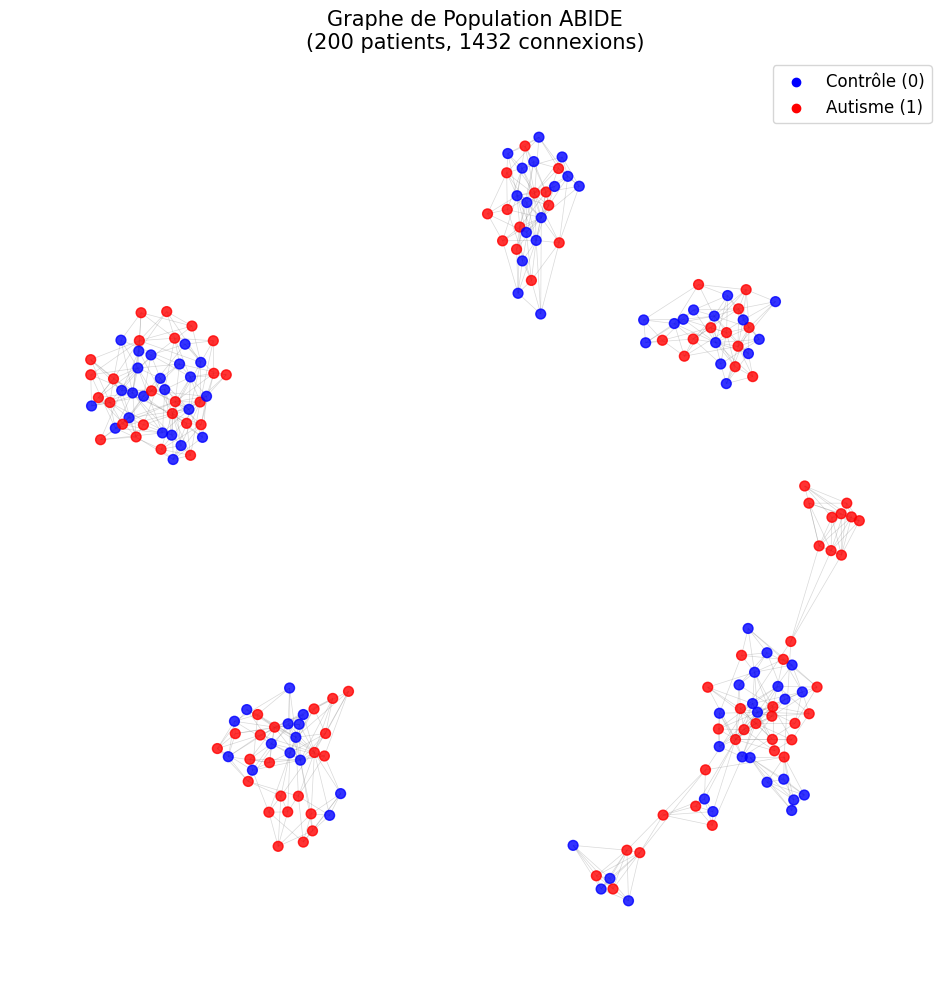

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

def plot_population_graph(data, title="Graphe de Population ABIDE"):
    plt.figure(figsize=(12, 12))

    # 1. Conversion PyG -> NetworkX
    # to_undirected=True car votre graphe est symétrique
    G = to_networkx(data, to_undirected=True)

    # 2. Gestion des couleurs (Diagnostics)
    # data.y contient 0 (Control) et 1 (Autism)
    # On définit une couleur pour chaque nœud
    node_colors = []
    for node_idx in range(data.num_nodes):
        label = data.y[node_idx].item()
        if label == 1:
            node_colors.append('red')   # Autiste
        else:
            node_colors.append('blue')  # Contrôle (Témoin)

    # 3. Calcul de la disposition (Layout)
    # 'spring_layout' simule des ressorts : les nœuds connectés s'attirent
    print("Calcul du layout (disposition visuelle)...")
    pos = nx.spring_layout(G, seed=42, k=0.15)  # k règle l'espacement

    # 4. Dessin
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3, edge_color='gray')

    # Légende manuelle pour comprendre
    plt.scatter([], [], c='blue', label='Contrôle (0)')
    plt.scatter([], [], c='red', label='Autisme (1)')
    plt.legend(fontsize='large')

    plt.title(title + f"\n({data.num_nodes} patients, {data.num_edges} connexions)", fontsize=15)
    plt.axis('off')
    plt.show()

# Lancer la visualisation
plot_population_graph(data)

## Modèle GCN (Moderne PyTorch)

In [35]:
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes, dropout=0.3):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)
        self.dropout = dropout

    def forward(self, x, edge_index, edge_weight):
        # Layer 1
        x = self.conv1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # Layer 2
        x = self.conv2(x, edge_index, edge_weight)
        return F.log_softmax(x, dim=1)

# Hyperparamètres du papier
# hidden=16, dropout=0.3, lr=0.005, epochs=150
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(num_features=data.num_features, hidden_channels=16, num_classes=2, dropout=0.3).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4) # weight_decay du papier

print("Modèle initialisé sur", device)

Modèle initialisé sur cuda


## Entraînement et Évaluation

Début de l'entraînement...
Epoch: 010, Loss: 0.6802, Train Acc: 0.5813, Test Acc: 0.5250
Epoch: 020, Loss: 0.6689, Train Acc: 0.6000, Test Acc: 0.5250
Epoch: 030, Loss: 0.6638, Train Acc: 0.6000, Test Acc: 0.4750
Epoch: 040, Loss: 0.6620, Train Acc: 0.6062, Test Acc: 0.5250
Epoch: 050, Loss: 0.6537, Train Acc: 0.6000, Test Acc: 0.5500
Epoch: 060, Loss: 0.6456, Train Acc: 0.6250, Test Acc: 0.5750
Epoch: 070, Loss: 0.6282, Train Acc: 0.6250, Test Acc: 0.5500
Epoch: 080, Loss: 0.6214, Train Acc: 0.6188, Test Acc: 0.4500
Epoch: 090, Loss: 0.6222, Train Acc: 0.6188, Test Acc: 0.5250
Epoch: 100, Loss: 0.6232, Train Acc: 0.6250, Test Acc: 0.6000
Epoch: 110, Loss: 0.6122, Train Acc: 0.6937, Test Acc: 0.5750
Epoch: 120, Loss: 0.6160, Train Acc: 0.6562, Test Acc: 0.5750
Epoch: 130, Loss: 0.6048, Train Acc: 0.6875, Test Acc: 0.5750
Epoch: 140, Loss: 0.5947, Train Acc: 0.6188, Test Acc: 0.5250
Epoch: 150, Loss: 0.5985, Train Acc: 0.6813, Test Acc: 0.5750


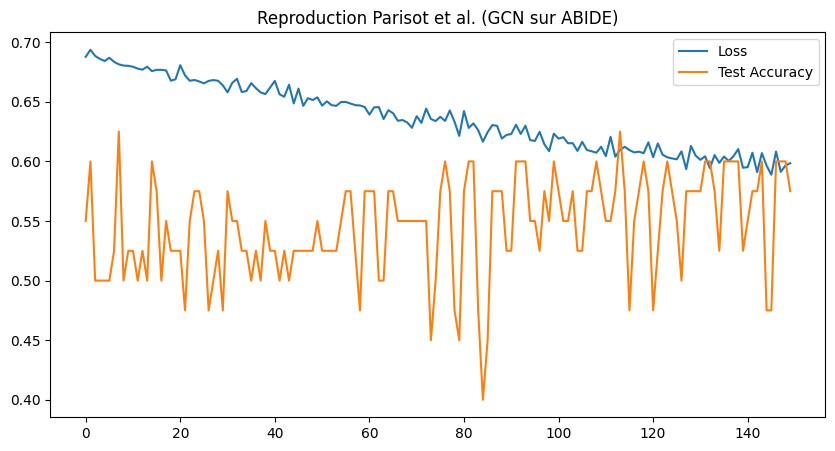

In [36]:
def train():
    model.train()
    optimizer.zero_grad()
    # Note: GCNConv peut prendre edge_weight en 3eme argument si on veut utiliser les poids du graphe
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data.x, data.edge_index, data.edge_attr)
    pred = out.argmax(dim=1)

    accs = []
    for mask in [data.train_mask, data.test_mask]:
        correct = pred[mask] == data.y[mask]
        accs.append(int(correct.sum()) / int(mask.sum()))
    return accs

losses = []
test_accs = []

print("Début de l'entraînement...")
for epoch in range(1, 151): # 150 époques comme dans le papier
    loss = train()
    train_acc, test_acc = test()
    losses.append(loss)
    test_accs.append(test_acc)
    if epoch % 10 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Visualisation rapide
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.plot(test_accs, label='Test Accuracy')
plt.legend()
plt.title("Reproduction Parisot et al. (GCN sur ABIDE)")
plt.show()

## Préparation de la Validation Croisée (Baseline Ridge)

In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import RidgeClassifier

# Configuration
# L'article utilise 10 folds. Pour tester vite, tu peux mettre 3.
# Pour le rapport final, remets 10.
N_SPLITS = 10
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=123)

print(f"--- 1. Baseline: Ridge Classifier ({N_SPLITS}-fold CV) ---")

# On utilise X (features sélectionnées) et y (labels) définis plus haut
clf = RidgeClassifier()
ridge_scores = cross_val_score(clf, X, y, cv=skf)

print(f"Scores par fold : {ridge_scores}")
print(f"MOYENNE RIDGE : {ridge_scores.mean()*100:.2f}% (+/- {ridge_scores.std()*100:.2f})")
print("-----------------------------------------------------")

--- 1. Baseline: Ridge Classifier (10-fold CV) ---
Scores par fold : [0.45 0.55 0.55 0.55 0.35 0.45 0.55 0.45 0.3  0.4 ]
MOYENNE RIDGE : 46.00% (+/- 8.60)
-----------------------------------------------------


## Fonctions utilitaires pour le GCN

In [38]:
def reset_model(model):
    """Réinitialise les poids du modèle pour repartir à zéro."""
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

def run_gcn_cv(edge_index, edge_attr, X, y, n_splits=10, epochs=150):
    """
    Lance une validation croisée complète pour une structure de graphe donnée.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123)
    scores = []

    # Données PyG globales
    x_tensor = torch.tensor(X, dtype=torch.float).to(device)
    y_tensor = torch.tensor(y, dtype=torch.long).to(device)
    edge_index = edge_index.to(device)
    edge_attr = edge_attr.to(device)

    print(f"Lancement de la CV sur {n_splits} folds...")

    for fold, (train_idx_np, test_idx_np) in enumerate(skf.split(X, y)):
        # 1. Préparation des masques pour ce fold
        train_mask = torch.zeros(len(y), dtype=torch.bool).to(device)
        test_mask = torch.zeros(len(y), dtype=torch.bool).to(device)
        train_mask[train_idx_np] = True
        test_mask[test_idx_np] = True

        # 2. Initialisation d'un nouveau modèle
        model = GCN(num_features=X.shape[1], hidden_channels=16, num_classes=2, dropout=0.3).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

        # 3. Boucle d'entraînement
        model.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = model(x_tensor, edge_index, edge_attr)
            loss = F.nll_loss(out[train_mask], y_tensor[train_mask])
            loss.backward()
            optimizer.step()

        # 4. Évaluation
        model.eval()
        out = model(x_tensor, edge_index, edge_attr)
        pred = out.argmax(dim=1)
        correct = pred[test_mask] == y_tensor[test_mask]
        acc = int(correct.sum()) / int(test_mask.sum())
        scores.append(acc)

        print(f"Fold {fold+1}/{n_splits} - Acc: {acc:.4f}")

    return np.array(scores)

## Génération du "Random Graph" (Ablation)

In [39]:
import random
from torch_geometric.utils import to_undirected

def build_random_graph(num_nodes, num_edges_target):
    """
    Construit un graphe aléatoire avec environ la même densité que le graphe réel.
    """
    print(f"Génération d'un graphe aléatoire avec ~{num_edges_target} arêtes...")

    # On génère des paires aléatoires
    # Note: C'est une approximation rapide pour Colab.
    # Pour être précis on utiliserait erdos_renyi_graph de networkx ou torch_geometric

    rows = []
    cols = []

    # On génère num_edges_target arêtes aléatoires
    for _ in range(num_edges_target):
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        if u != v:
            rows.append(u)
            cols.append(v)

    edge_index = torch.tensor([rows, cols], dtype=torch.long)

    # On rend le graphe non-dirigé (symétrique)
    edge_index = to_undirected(edge_index)

    # Poids des arêtes = 1.0 (ou aléatoire, l'article utilise des poids phénotypiques, ici on simplifie pour l'ablation)
    edge_attr = torch.ones(edge_index.shape[1], dtype=torch.float)

    return edge_index, edge_attr

# Calcul du nombre d'arêtes du "VRAI" graphe pour calibrer le faux
num_edges_real = data.edge_index.shape[1] // 2 # Divisé par 2 car non-dirigé
edge_index_random, edge_attr_random = build_random_graph(X.shape[0], num_edges_real)

print("Graphe aléatoire prêt.")

Génération d'un graphe aléatoire avec ~716 arêtes...
Graphe aléatoire prêt.


#### Plot le graph

Calcul du layout pour Graphe Aléatoire (Ablation)...


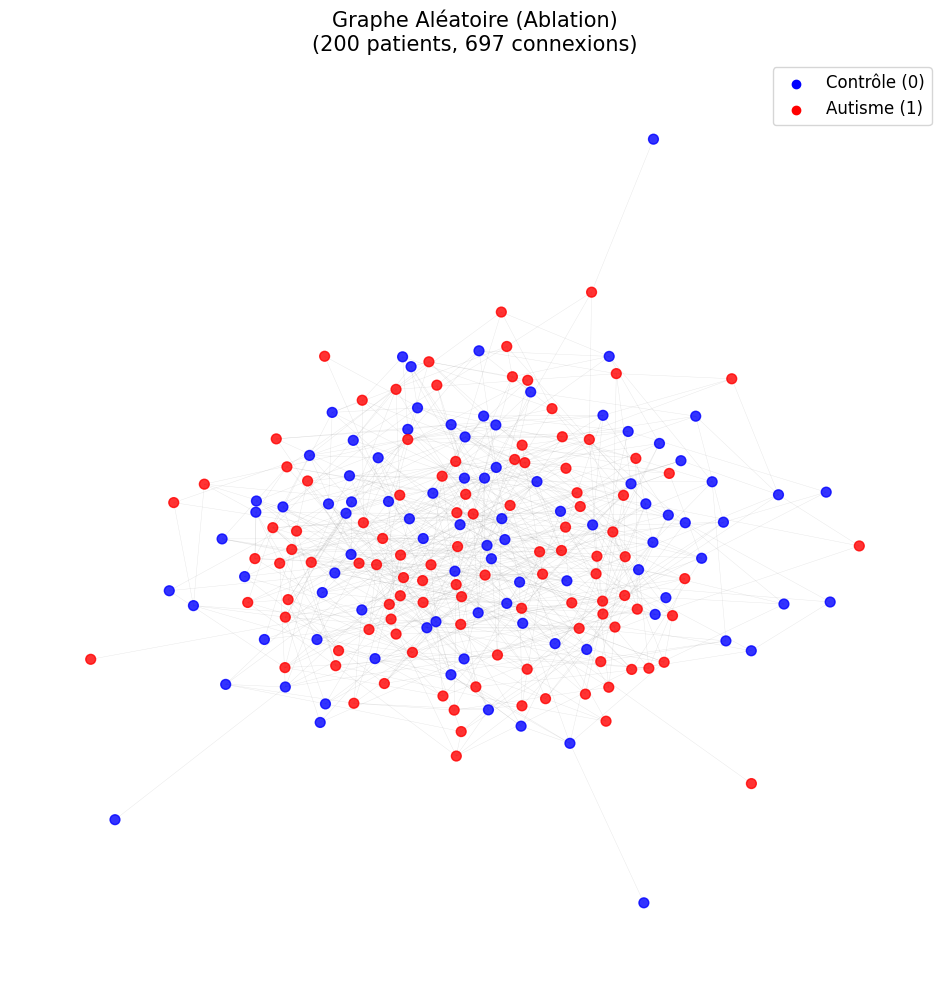

In [40]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
from torch_geometric.data import Data

def plot_random_graph_viz(edge_index, y, num_nodes, title="Graphe Aléatoire (Ablation)"):
    plt.figure(figsize=(12, 12))

    # 1. Création d'un objet Data temporaire pour la conversion
    # On n'a pas besoin de 'x' (features) pour le dessin, juste de la structure et des labels
    temp_data = Data(edge_index=edge_index, y=y, num_nodes=num_nodes)

    # 2. Conversion en NetworkX
    G = to_networkx(temp_data, to_undirected=True)

    # 3. Couleurs (Rouge = Autiste, Bleu = Contrôle)
    node_colors = []
    # On s'assure que y est bien un tenseur CPU pour l'itération
    y_cpu = y.cpu() if torch.is_tensor(y) else torch.tensor(y)

    for i in range(num_nodes):
        if y_cpu[i].item() == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')

    # 4. Dessin
    print(f"Calcul du layout pour {title}...")
    # On utilise spring_layout qui essaie d'écarter les noeuds mais de rapprocher les connectés
    pos = nx.spring_layout(G, seed=42, k=0.15)

    nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors, alpha=0.8)
    # Arêtes plus fines et grises pour ne pas surcharger la vue
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.2, edge_color='gray')

    # Légende
    plt.scatter([], [], c='blue', label='Contrôle (0)')
    plt.scatter([], [], c='red', label='Autisme (1)')
    plt.legend(fontsize='large')

    plt.title(title + f"\n({num_nodes} patients, {edge_index.shape[1]//2} connexions)", fontsize=15)
    plt.axis('off')
    plt.show()

# --- Lancement de la visualisation ---
# On utilise les variables créées par votre fonction build_random_graph
# X et y doivent être disponibles dans votre notebook (depuis les étapes précédentes)

# On s'assure que y est un tenseur pour la fonction
if not torch.is_tensor(y):
    y_tensor_viz = torch.tensor(y, dtype=torch.long)
else:
    y_tensor_viz = y

plot_random_graph_viz(edge_index_random, y_tensor_viz, X.shape[0])

## Exécution de l'Expérience Complète

In [41]:
# --- 2. GCN avec Population Graph (Proposed Method) ---
print(f"\n--- 2. Proposed Method: Population Graph GCN ({N_SPLITS}-fold CV) ---")
# On réutilise edge_index et edge_attr calculés dans la Cellule 3 (Ton "Vrai" graphe)
pop_gcn_scores = run_gcn_cv(data.edge_index, data.edge_attr, X, y, n_splits=N_SPLITS)
print(f"MOYENNE POP-GCN : {pop_gcn_scores.mean()*100:.2f}% (+/- {pop_gcn_scores.std()*100:.2f})")


# --- 3. GCN avec Random Graph (Ablation Study) ---
print(f"\n--- 3. Ablation: Random Graph GCN ({N_SPLITS}-fold CV) ---")
rand_gcn_scores = run_gcn_cv(edge_index_random, edge_attr_random, X, y, n_splits=N_SPLITS)
print(f"MOYENNE RAND-GCN : {rand_gcn_scores.mean()*100:.2f}% (+/- {rand_gcn_scores.std()*100:.2f})")


--- 2. Proposed Method: Population Graph GCN (10-fold CV) ---
Lancement de la CV sur 10 folds...
Fold 1/10 - Acc: 0.2000
Fold 2/10 - Acc: 0.6000
Fold 3/10 - Acc: 0.4000
Fold 4/10 - Acc: 0.5000
Fold 5/10 - Acc: 0.5000
Fold 6/10 - Acc: 0.5500
Fold 7/10 - Acc: 0.6000
Fold 8/10 - Acc: 0.5000
Fold 9/10 - Acc: 0.6000
Fold 10/10 - Acc: 0.5500
MOYENNE POP-GCN : 50.00% (+/- 11.62)

--- 3. Ablation: Random Graph GCN (10-fold CV) ---
Lancement de la CV sur 10 folds...
Fold 1/10 - Acc: 0.5000
Fold 2/10 - Acc: 0.5500
Fold 3/10 - Acc: 0.5000
Fold 4/10 - Acc: 0.5000
Fold 5/10 - Acc: 0.5000
Fold 6/10 - Acc: 0.4000
Fold 7/10 - Acc: 0.5500
Fold 8/10 - Acc: 0.1500
Fold 9/10 - Acc: 0.5000
Fold 10/10 - Acc: 0.5000
MOYENNE RAND-GCN : 46.50% (+/- 11.19)


## Visualisation (Le Graphique du Rapport)

/tmp/ipython-input-1699816514.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)


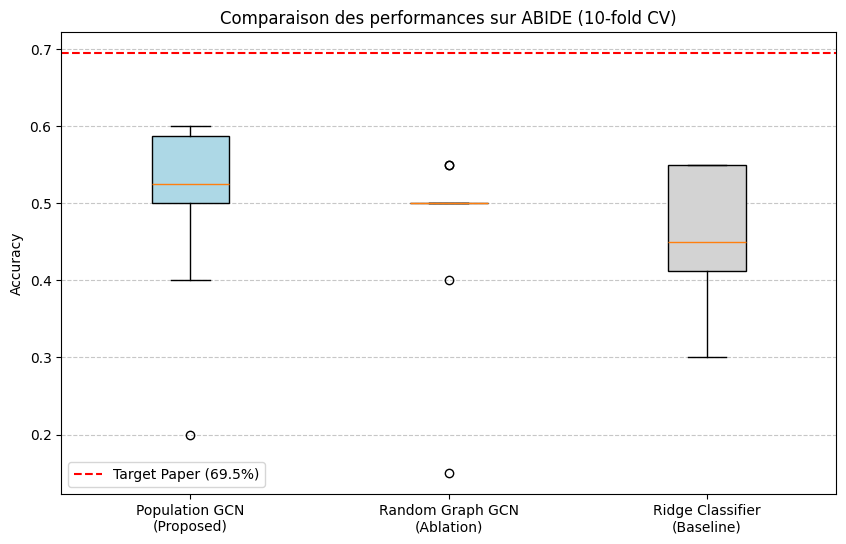

Interprétation :
Si la boîte bleue est au-dessus des grises et proche de la ligne rouge, BRAVO !


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Création des données pour le plot
data_to_plot = [pop_gcn_scores, rand_gcn_scores, ridge_scores]
labels = ['Population GCN\n(Proposed)', 'Random Graph GCN\n(Ablation)', 'Ridge Classifier\n(Baseline)']

# Boxplot
bplot = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)

# Couleurs (Bleu pour le gagnant, Gris/Rouge pour les autres)
colors = ['lightblue', 'lightgrey', 'lightgrey']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title(f'Comparaison des performances sur ABIDE ({N_SPLITS}-fold CV)')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ligne cible de l'article
plt.axhline(y=0.695, color='r', linestyle='--', label='Target Paper (69.5%)')
plt.legend()

plt.show()

print("Interprétation :")
print(f"Si la boîte bleue est au-dessus des grises et proche de la ligne rouge, BRAVO !")

## Ajout de l'AUC

In [44]:
from sklearn.metrics import roc_auc_score

def run_gcn_cv_with_auc(edge_index, edge_attr, X, y, n_splits=10, epochs=150):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123)
    acc_scores = []
    auc_scores = []

    # Données PyG globales
    x_tensor = torch.tensor(X, dtype=torch.float).to(device)
    y_tensor = torch.tensor(y, dtype=torch.long).to(device)
    edge_index = edge_index.to(device)
    edge_attr = edge_attr.to(device)

    print(f"Lancement de la CV (Acc + AUC) sur {n_splits} folds...")

    for fold, (train_idx_np, test_idx_np) in enumerate(skf.split(X, y)):
        # Masques
        train_mask = torch.zeros(len(y), dtype=torch.bool).to(device)
        test_mask = torch.zeros(len(y), dtype=torch.bool).to(device)
        train_mask[train_idx_np] = True
        test_mask[test_idx_np] = True

        # Nouveau modèle
        model = GCN(num_features=X.shape[1], hidden_channels=16, num_classes=2, dropout=0.3).to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)

        # Entraînement
        model.train()
        for epoch in range(epochs):
            optimizer.zero_grad()
            out = model(x_tensor, edge_index, edge_attr)
            loss = F.nll_loss(out[train_mask], y_tensor[train_mask])
            loss.backward()
            optimizer.step()

        # Évaluation
        model.eval()
        with torch.no_grad():
            out = model(x_tensor, edge_index, edge_attr)

            # 1. Accuracy
            pred = out.argmax(dim=1)
            correct = pred[test_mask] == y_tensor[test_mask]
            acc = int(correct.sum()) / int(test_mask.sum())
            acc_scores.append(acc)

            # 2. AUC (Besoin des probabilités pour la classe 1)
            # out est en log_softmax, on prend l'exponentielle pour avoir la proba
            probs = torch.exp(out)[:, 1]
            y_true = y_tensor[test_mask].cpu().numpy()
            y_scores = probs[test_mask].cpu().numpy()

            try:
                auc = roc_auc_score(y_true, y_scores)
                auc_scores.append(auc)
            except ValueError:
                auc_scores.append(0.5) # Cas rare où un fold n'a qu'une seule classe

        if fold % 2 == 0: # Moins de logs
            print(f"Fold {fold+1} - Acc: {acc:.4f}, AUC: {auc:.4f}")

    return np.array(acc_scores), np.array(auc_scores)

In [45]:
# Recalcul de la Baseline avec AUC
print("--- Baseline: Ridge Classifier (Acc + AUC) ---")
ridge_accs = []
ridge_aucs = []

for train_idx, test_idx in skf.split(X, y):
    clf = RidgeClassifier()
    clf.fit(X[train_idx], y[train_idx])

    # Accuracy
    acc = clf.score(X[test_idx], y[test_idx])
    ridge_accs.append(acc)

    # AUC (via decision_function)
    scores = clf.decision_function(X[test_idx])
    auc = roc_auc_score(y[test_idx], scores)
    ridge_aucs.append(auc)

ridge_accs = np.array(ridge_accs)
ridge_aucs = np.array(ridge_aucs)
print(f"Moyenne Ridge - Acc: {ridge_accs.mean():.4f}, AUC: {ridge_aucs.mean():.4f}")

--- Baseline: Ridge Classifier (Acc + AUC) ---
Moyenne Ridge - Acc: 0.4600, AUC: 0.4609


In [46]:
# Proposed Method (Population Graph)
pop_acc, pop_auc = run_gcn_cv_with_auc(data.edge_index, data.edge_attr, X, y, n_splits=N_SPLITS)

# Ablation (Random Graph)
rand_acc, rand_auc = run_gcn_cv_with_auc(edge_index_random, edge_attr_random, X, y, n_splits=N_SPLITS)

Lancement de la CV (Acc + AUC) sur 10 folds...
Fold 1 - Acc: 0.2500, AUC: 0.2828
Fold 3 - Acc: 0.4000, AUC: 0.3838
Fold 5 - Acc: 0.5000, AUC: 0.5354
Fold 7 - Acc: 0.6000, AUC: 0.6667
Fold 9 - Acc: 0.6500, AUC: 0.6800
Lancement de la CV (Acc + AUC) sur 10 folds...
Fold 1 - Acc: 0.5500, AUC: 0.4242
Fold 3 - Acc: 0.4500, AUC: 0.2929
Fold 5 - Acc: 0.6000, AUC: 0.5051
Fold 7 - Acc: 0.6000, AUC: 0.5455
Fold 9 - Acc: 0.5000, AUC: 0.4100


/tmp/ipython-input-2193924042.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = ax1.boxplot(data_acc, patch_artist=True, labels=labels)
/tmp/ipython-input-2193924042.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot2 = ax2.boxplot(data_auc, patch_artist=True, labels=labels)


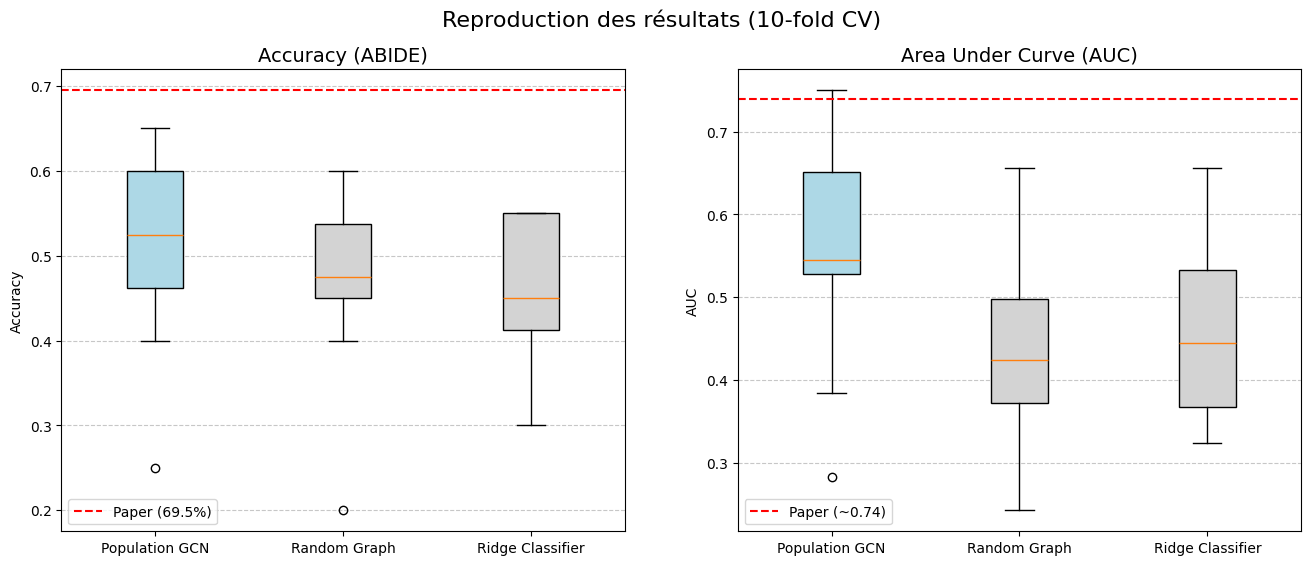

In [48]:
import matplotlib.pyplot as plt

# Configuration des données
data_acc = [pop_acc, rand_acc, ridge_accs]
data_auc = [pop_auc, rand_auc, ridge_aucs]
labels = ['Population GCN', 'Random Graph', 'Ridge Classifier']
colors = ['lightblue', 'lightgrey', 'lightgrey']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1 : Accuracy ---
bplot1 = ax1.boxplot(data_acc, patch_artist=True, labels=labels)
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_title(f'Accuracy (ABIDE)', fontsize=14)
ax1.set_ylabel('Accuracy')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
# Ligne cible article (69.5%)
ax1.axhline(y=0.695, color='r', linestyle='--', label='Paper (69.5%)')
ax1.legend()

# --- Plot 2 : AUC ---
bplot2 = ax2.boxplot(data_auc, patch_artist=True, labels=labels)
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_title(f'Area Under Curve (AUC)', fontsize=14)
ax2.set_ylabel('AUC')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
# Ligne cible article (AUC ~0.70 d'après Fig 2b)
ax2.axhline(y=0.74, color='r', linestyle='--', label='Paper (~0.74)')
ax2.legend()

plt.suptitle(f"Reproduction des résultats ({N_SPLITS}-fold CV)", fontsize=16)
plt.show()